# <p style="background-color:#F29631; font-family:newtimeroman; color:#375458; font-size:150%; text-align:center; border-radius:10px 10px;">TravelTide Customer Segmentation</p>
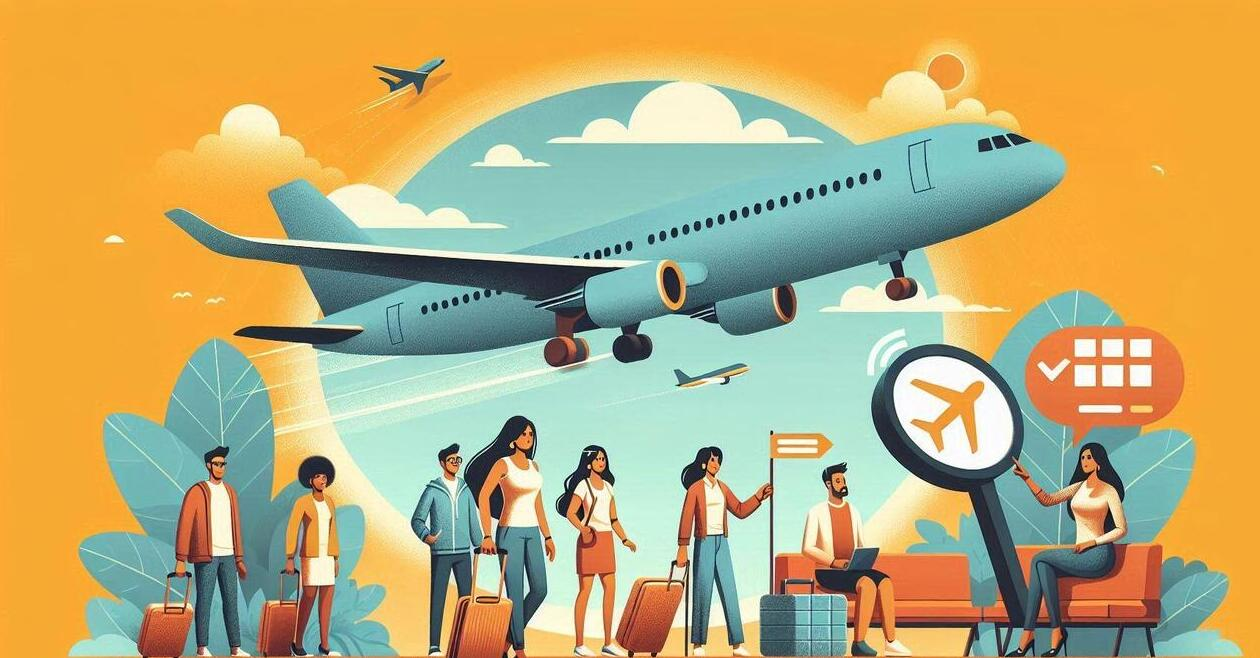

TravelTide, an e-booking startup, has grown steadily due to its advanced data aggregation and search technology but struggles with customer retention, prompting CEO Kevin Talanick to appoint Elena Tarrant as Head of Marketing to enhance retention through a personalized rewards program. Elena aims to leverage her expertise in customer retention strategies by offering five tailored perks which are
1) free hotel meals 
2) free checked bags 
3) no cancellation fees 
4) exclusive discounts
5) free hotel nights with flights.

She requires analytics support to identify and emphasize customers' preferred perks. 
My mission as a Data Analyst is two-fold: 
1) to validate Elena’s hypothesis about customers' interest in the proposed perks 
2) to personalize and assign each customer's likely favorite perk based on their data.
<a id='top'></a>
<div class="list-group" id="list-tab" role ="tablist">
## <p style="background-color:#F29631; font-family:newtimeroman; color:#375458; font-size:150%; text-align:center; border-radius:10px 10px;">Table of Content</p>
    
   * [1. IMPORTING LIBRARIES](#1)
    
   * [2. LOADING DATA](#2)
    
   * [3. DATA CLEANING](#3)
    
   * [4. EXPLORATORY DATA ANALYSIS](#4)
    
   * [5. FEATURES ENGINEERING](#5)
    
   * [6. SCALING AND DIMENSIONALITY REDUCTION](#6)
    
   * [7. CLUSTERING](#7)
    
   * [8. THRESHOLDING](#8)
    
   * [9. FUZZY SEGMENTATION](#9)
    
   * [10. PROFILING](#10)
    
   

<a id="1"></a>
## <p style="background-color:#F29631; font-family:newtimeroman; color:#375458; font-size:150%; text-align:center; border-radius:10px 10px;">Importing Libraries</p>

In [1]:

##importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

<a id="3"></a>
## <p style="background-color:#F29631; font-family:newtimeroman; color:#375458; font-size:150%; text-align:center; border-radius:10px 10px;">Loading Data</p>


In [2]:
#loading extracted Dataset
file_path = "\\Users\David Alaofin\Documents\MasterSchool Folder\Project 2\TravelTide orginal table.csv"

df = pd.read_csv(file_path, low_memory=False)

In [3]:
# checking that the dataset is loaded correctly
df.head(5)

,user_id,sign_up_date,gender,married,has_children,home_country,home_city,home_airport,destination,destination_airport,page_clicks,base_fare_usd,home_airport_lat,home_airport_lon,destination_airport_lat,destination_airport_lon,check_in_time,check_out_time,age,avg_session_length,num_sessions,total_flights_booked,total_hotels_booked,total_return_flights_booked,total_checked_bags,cancellations,total_flight_discounts,total_hotel_discounts,total_rooms_booked
0,23557,2021-07-22,F,married,has no children,usa,new york,LGA,NaN,NaN,2,NaN,40.777,-73.872,NaN,NaN,NaN,NaN,65,0.3,1,0,0,NaN,0,0,0.0,0.0,NaN
1,23557,2021-07-22,F,married,has no children,usa,new york,LGA,NaN,NaN,3,NaN,40.777,-73.872,NaN,NaN,NaN,NaN,65,0.4,1,0,0,NaN,0,0,0.0,0.0,NaN
2,23557,2021-07-22,F,married,has no children,usa,new york,LGA,NaN,NaN,5,NaN,40.777,-73.872,NaN,NaN,NaN,NaN,65,0.6,1,0,0,NaN,0,0,0.0,0.1,NaN
3,23557,2021-07-22,F,married,has no children,usa,new york,LGA,NaN,NaN,9,NaN,40.777,-73.872,NaN,NaN,2023-07-25 11:00:00,2023-08-12 11:00:00,65,1.2,1,0,1,NaN,0,0,0.0,0.0,2.0
4,23557,2021-07-22,F,married,has no children,usa,new york,LGA,NaN,NaN,9,NaN,40.777,-73.872,NaN,NaN,NaN,NaN,65,1.2,1,0,0,NaN,0,0,0.0,0.0,NaN


### Checking the DataSet
I checked the dataset using different functions, to understand the data better

In [4]:
# checking the data types in the DataSet
df.dtypes

user_id                          int64
sign_up_date                    object
gender                          object
married                         object
has_children                    object
home_country                    object
home_city                       object
home_airport                    object
destination                     object
destination_airport             object
page_clicks                      int64
base_fare_usd                  float64
home_airport_lat               float64
home_airport_lon               float64
destination_airport_lat        float64
destination_airport_lon        float64
check_in_time                   object
check_out_time                  object
age                              int64
avg_session_length             float64
num_sessions                     int64
total_flights_booked             int64
total_hotels_booked              int64
total_return_flights_booked    float64
total_checked_bags               int64
cancellations            

In [5]:
#checking the structure of the dataset
df.shape

(45506, 29)

In [6]:
# checking the data structure
df.describe()

,user_id,page_clicks,base_fare_usd,home_airport_lat,home_airport_lon,destination_airport_lat,destination_airport_lon,age,avg_session_length,num_sessions,total_flights_booked,total_hotels_booked,total_return_flights_booked,total_checked_bags,cancellations,total_flight_discounts,total_hotel_discounts,total_rooms_booked
count,45506.000000,45506.000000,14267.000000,45506.000000,45506.000000,14267.000000,14267.000000,45506.000000,45506.000000,45506.000000,45506.000000,45506.000000,14267.000000,45506.000000,45506.000000,45506.000000,45506.000000,14724.000000
mean,545109.868611,18.479299,525.816936,38.445464,-94.157296,38.610806,-88.959100,41.872149,3.314515,1.081418,0.314684,0.327847,0.956894,0.185932,0.013405,0.025455,0.015298,1.194716
std,64436.701886,22.082198,818.296070,6.178685,18.041041,6.946884,33.054401,11.865994,11.416022,0.300435,0.464537,0.469527,0.204137,0.468684,0.115002,0.065606,0.045202,0.499456
min,23557.000000,1.000000,2.410000,21.316000,-157.927000,-37.008000,-157.927000,17.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,517076.000000,7.000000,200.405000,33.818000,-112.383000,33.942000,-112.383000,35.000000,0.900000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,540150.000000,14.000000,381.740000,39.175000,-90.035000,39.872000,-87.752000,42.000000,1.800000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,573621.000000,22.000000,600.625000,42.276000,-79.370000,42.409000,-75.241000,49.000000,2.800000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,844489.000000,566.000000,21548.040000,61.251000,-63.499000,55.972000,174.792000,89.000000,120.000000,5.000000,2.000000,2.000000,2.000000,8.000000,1.000000,0.600000,0.500000,4.000000


<a id="3"></a>
## <p style="background-color:#F29631; font-family:newtimeroman; color:#375458; font-size:150%; text-align:center; border-radius:10px 10px;">Cleaning Data</p>
The Data cleaning process involves 
1) Identifying and handling outliers
2) filtering and removing null values


### Outliers
From the description of the data above, there are possible presence of outliers. This is prominently seen in

####  The Base_fare_usd variable:

The Base_fare_usd ranges significantly from a minimum of 2.41 USD to a maximum of 21,548.00 USD, suggesting a wide dispersion in base fares. The mean base fare stands at 525.82 USD, which is considerably higher than the median of 381.74 USD. This substantial difference between the mean and median, along with a third quartile (Q3) of 600.62 USD that is much lower than the maximum value, indicates potential outliers in the data. These outliers may be driving the mean upward, reflecting a skewed distribution.
#### The Page_Clicks variable:

The analysis reveals a maximum of 566 page clicks and a minimum of 1 click, with a mean of 18.48 clicks and a median of 14 clicks. The discrepancy between the mean and median, along with a third quartile (Q3) of 22 clicks that is significantly distant from the maximum, suggests the presence of outliers. These outliers could be affecting the overall distribution, skewing it and possibly influencing the analysis of page engagement metrics.

### Visualising for Outliers
I used two visual charts to check the possibility of outliers
1) Histogram 
2) Box Plot

In [7]:
# Plotting a histogram for base_fare_usd
import matplotlib.pyplot as plt

def plot_histogram(data_frame, column_name, bins=100, color='red', alpha=0.7):
 
    plt.figure(figsize=(10, 6))
    plt.hist(data_frame[column_name], bins=bins, color=color, alpha=alpha)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


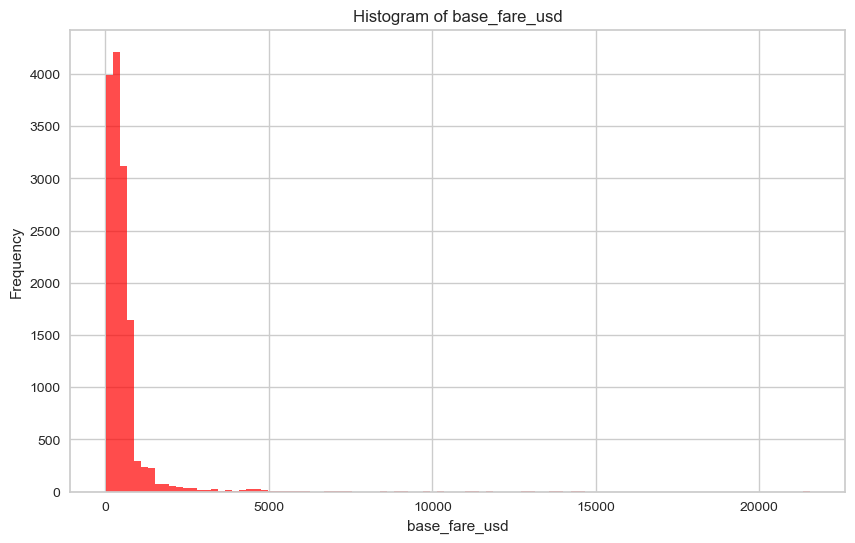

In [8]:
plot_histogram(df, 'base_fare_usd')

The plot reveals that the distribution of base fares in USD is heavily concentrated at the lower end of the scale, exhibiting a significant right skew. This indicates that higher base fares are relatively rare. Most of the fares are below 1,000 USD, with a particularly high frequency of values in the very first bin, suggesting that a large number of fares are extremely low, perhaps nearing $0. Additionally, there is a noticeable presence of outliers, which are markedly distant from the main cluster of data points. This observation highlights the need to investigate these outliers to understand their impact on the distribution and potential distortions in the data analysis

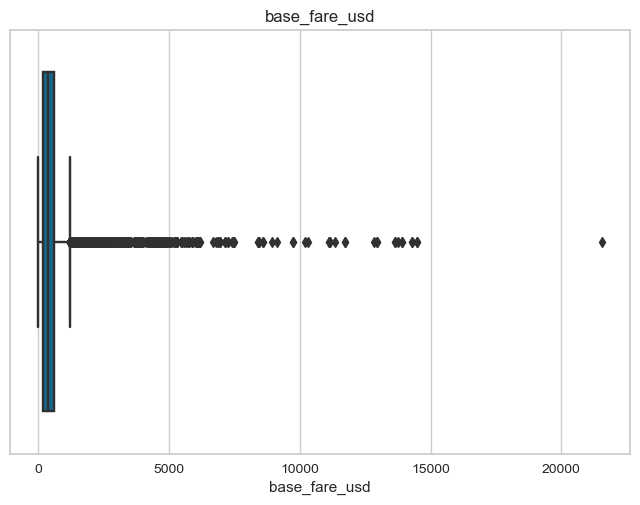

In [9]:
# Visualising the Base fares in USD with a box plot
sns.boxplot(x=df['base_fare_usd'])
plt.title('base_fare_usd')
plt.show()


The box plot complements the histogram by providing a clear picture of the distribution's five-number summary (minimum, first quartile, median, third quartile, and maximum), along with any outliers. The bulk of the data (the box) is also situated towards the lower end of the fare range, and the long whiskers and points beyond them indicate outliers, especially towards the higher fare range. The whiskers extend significantly, suggesting some base fares are much higher than the typical range but are rare and so can be treated as outliers.

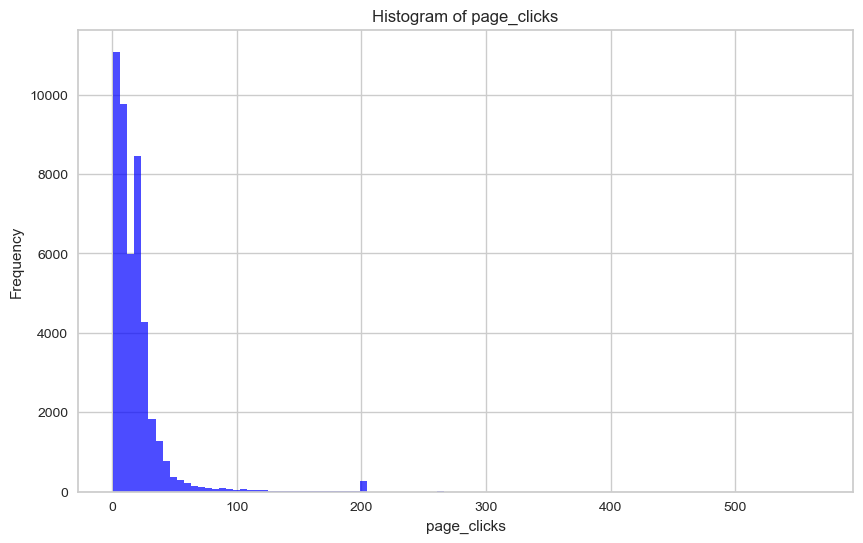

In [10]:
# Plotting a  histogram for page_clicks
plot_histogram(df, 'page_clicks', color='blue')

The histogram displays a right-skewed distribution where most pages receive a relatively small number of clicks, with the majority of data points concentrated near the start of the x-axis. The frequency of clicks decreases sharply as the number of clicks increases, culminating in a long tail that represents a minority of pages receiving a disproportionately high number of clicks, hinting at outlier behavior.

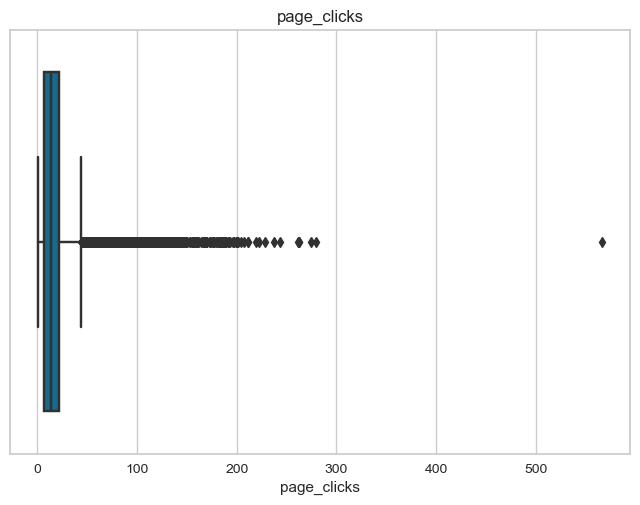

In [11]:
#page clicks Box Plot
sns.boxplot(x=df['page_clicks'])
plt.title('page_clicks')
plt.show()

The box plot emphasizes that while the core range of page clicks is narrow, showing a concentration of values around the lower quartile, there are a significant number of outliers represented by points far beyond the upper whisker. These outliers indicate pages with exceptionally high click counts compared to the typical page, suggesting anomalies or exceptionally high-performing pages. The presence of these outliers underlines the variability and extremes in user engagement across different pages.

## Handling Outliers for Base Fare USD

### Z-Score Method
I utilize the Z-score method to manage outliers in the base fare USD data.

In [12]:
# defining the limits
# Calculate mean and standard deviation for the 'base_fare_usd' column
mean = df['base_fare_usd'].mean()
std_dev = df['base_fare_usd'].std()
# The limit is defined as 5 times the standard deviation from the mean.
cut_off = std_dev * 5

# Define the upper and lower bounds for detecting outliers
lower_bound = mean - cut_off
upper_bound = mean + cut_off
# showing the limits
print('Upper Limit:', upper_bound)
print('Lower Limit:', lower_bound)

Upper Limit: 4617.297286681259
Lower Limit: -3565.6634141081877


### Removing the Outliers
To address outliers, I employed the capping method instead of completely removing them.


In [13]:
#capping the base_fare_usd
new_df=df.copy()
new_df.loc[new_df['base_fare_usd']>upper_bound, 'base_fare_usd']= upper_bound
new_df.loc[new_df['base_fare_usd']<lower_bound, 'base_fare_usd']= lower_bound

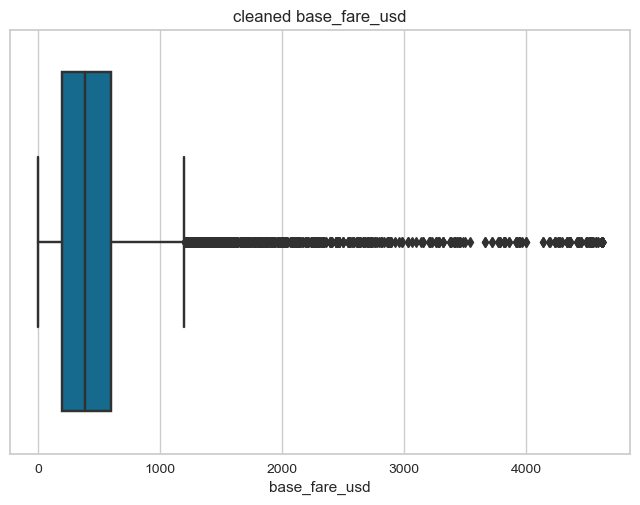

In [14]:
#displaying the cleaned base_fare_usd
sns.boxplot(x=new_df['base_fare_usd'])
plt.title('cleaned base_fare_usd')
plt.show()

## Handling Outliers for Page Clicks

### Z-Score Method
I also used the Z-score method to manage outliers in page_clicks

In [15]:
 #defining the limits
# Calculate mean and standard deviation for the 'base_fare_usd' column
mean = new_df['page_clicks'].mean()
std_dev = new_df['page_clicks'].std()
# The limit is defined as 5 times the standard deviation from the mean.
cut_off = std_dev * 5

# Define the upper and lower bounds for detecting outliers
lower_bound = mean - cut_off
upper_bound = mean + cut_off
# showing the limits
print('Upper Limit:', upper_bound)
print('Lower Limit:', lower_bound)

Upper Limit: 128.89028710797652
Lower Limit: -91.93168824189294


### Removing the Outliers
To address outliers, I employed the capping method instead of completely removing them.


In [16]:
#capping the page_clicks
clean_df=new_df.copy()
clean_df.loc[clean_df['page_clicks']>upper_bound, 'page_clicks']= upper_bound
clean_df.loc[clean_df['page_clicks']<lower_bound, 'page_clicks']= lower_bound

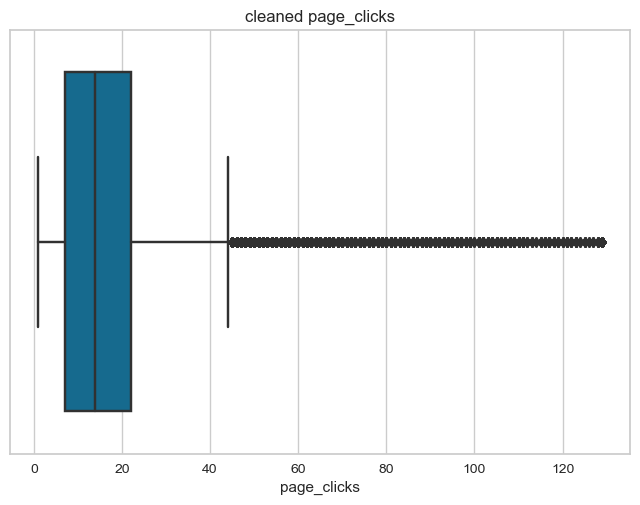

In [17]:
#displaying the cleaned page_clicks
sns.boxplot(x=clean_df['page_clicks'])
plt.title('cleaned page_clicks')
plt.show()

To ensure that the data has been correctly processed and that the outliers have been effectively handled. I used the describe() function for a quick check

In [18]:
#checking the dataset
clean_df.describe()

,user_id,page_clicks,base_fare_usd,home_airport_lat,home_airport_lon,destination_airport_lat,destination_airport_lon,age,avg_session_length,num_sessions,total_flights_booked,total_hotels_booked,total_return_flights_booked,total_checked_bags,cancellations,total_flight_discounts,total_hotel_discounts,total_rooms_booked
count,45506.000000,45506.000000,14267.000000,45506.000000,45506.000000,14267.000000,14267.000000,45506.000000,45506.000000,45506.000000,45506.000000,45506.000000,14267.000000,45506.000000,45506.000000,45506.000000,45506.000000,14724.000000
mean,545109.868611,17.954131,505.223785,38.445464,-94.157296,38.610806,-88.959100,41.872149,3.314515,1.081418,0.314684,0.327847,0.956894,0.185932,0.013405,0.025455,0.015298,1.194716
std,64436.701886,18.207701,603.900011,6.178685,18.041041,6.946884,33.054401,11.865994,11.416022,0.300435,0.464537,0.469527,0.204137,0.468684,0.115002,0.065606,0.045202,0.499456
min,23557.000000,1.000000,2.410000,21.316000,-157.927000,-37.008000,-157.927000,17.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,517076.000000,7.000000,200.405000,33.818000,-112.383000,33.942000,-112.383000,35.000000,0.900000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,540150.000000,14.000000,381.740000,39.175000,-90.035000,39.872000,-87.752000,42.000000,1.800000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,573621.000000,22.000000,600.625000,42.276000,-79.370000,42.409000,-75.241000,49.000000,2.800000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,844489.000000,128.890287,4617.297287,61.251000,-63.499000,55.972000,174.792000,89.000000,120.000000,5.000000,2.000000,2.000000,2.000000,8.000000,1.000000,0.600000,0.500000,4.000000


The Dataset had been cleaned of outliers

In [19]:
clean_df.shape

(45506, 29)

### Further Data Cleaning

The next stage of cleaning is replacing the Null (NaN) values in the dataset

In [20]:
clean_df.fillna(0, inplace=True)

In [21]:
#checking that the dataset is cleaned correctly
clean_df.head(3)

,user_id,sign_up_date,gender,married,has_children,home_country,home_city,home_airport,destination,destination_airport,page_clicks,base_fare_usd,home_airport_lat,home_airport_lon,destination_airport_lat,destination_airport_lon,check_in_time,check_out_time,age,avg_session_length,num_sessions,total_flights_booked,total_hotels_booked,total_return_flights_booked,total_checked_bags,cancellations,total_flight_discounts,total_hotel_discounts,total_rooms_booked
0,23557,2021-07-22,F,married,has no children,usa,new york,LGA,0,0,2.0,0.0,40.777,-73.872,0.0,0.0,0,0,65,0.3,1,0,0,0.0,0,0,0.0,0.0,0.0
1,23557,2021-07-22,F,married,has no children,usa,new york,LGA,0,0,3.0,0.0,40.777,-73.872,0.0,0.0,0,0,65,0.4,1,0,0,0.0,0,0,0.0,0.0,0.0
2,23557,2021-07-22,F,married,has no children,usa,new york,LGA,0,0,5.0,0.0,40.777,-73.872,0.0,0.0,0,0,65,0.6,1,0,0,0.0,0,0,0.0,0.1,0.0


#<a id="4"></a>
## <p style="background-color:#F29631; font-family:newtimeroman; color:#375458; font-size:150%; text-align:center; border-radius:10px 10px;">Exploratory Data Analysis</p>

### Univariate Analysis

In [22]:
# Finding percentage for gender
clean_df['gender'].value_counts()

gender
F    40214
M     5208
O       84
Name: count, dtype: int64

#### Customer Demographics:
* Females: 40,214 (88.371%)
* Males: 5,208 (11.445%)
* Others: 84 (0.002%)
We can see it better with a pie chart

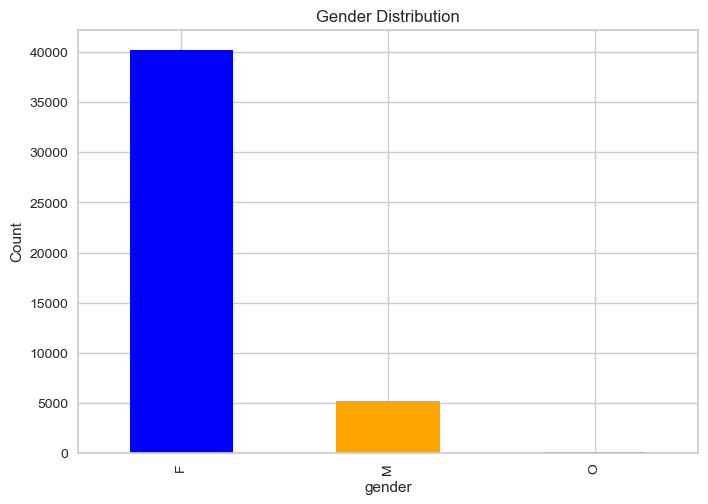

In [23]:
clean_df['gender'].value_counts().plot(kind='bar', color=['blue', 'orange', 'green'] )
# Add labels to the bars
plt.title('Gender Distribution')
plt.ylabel('Count')  
plt.show()

In [24]:
# Grouping by Marital Status 
clean_df['married'].value_counts()

married
unmarried    25396
married      20110
Name: count, dtype: int64

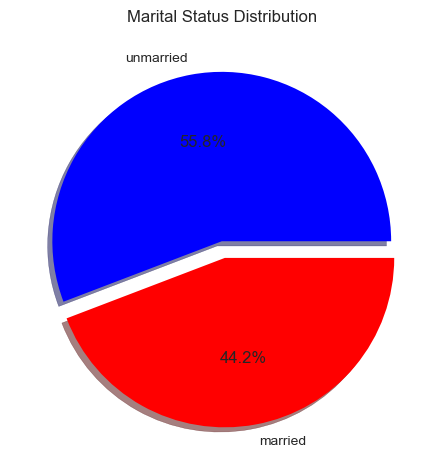

In [25]:
clean_df['married'].value_counts().plot(kind='pie', colors=['blue', 'red'], autopct='%1.1f%%', shadow=True, explode=(0, 0.1))  # Changed to pie chart
plt.title('Marital Status Distribution')
plt.ylabel('')  
plt.show()

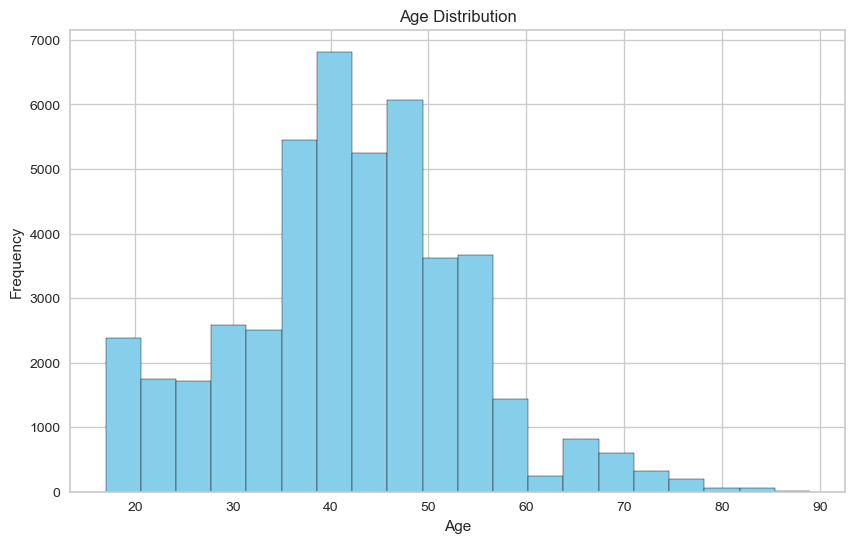

In [26]:
# Plotting a histogram of age distribution
plt.figure(figsize=(10, 6))
clean_df['age'].hist(bins=20, color='skyblue', edgecolor='black')  # Added color and edgecolor for better visual distinction
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)  # Adding grid for better readability
plt.show()

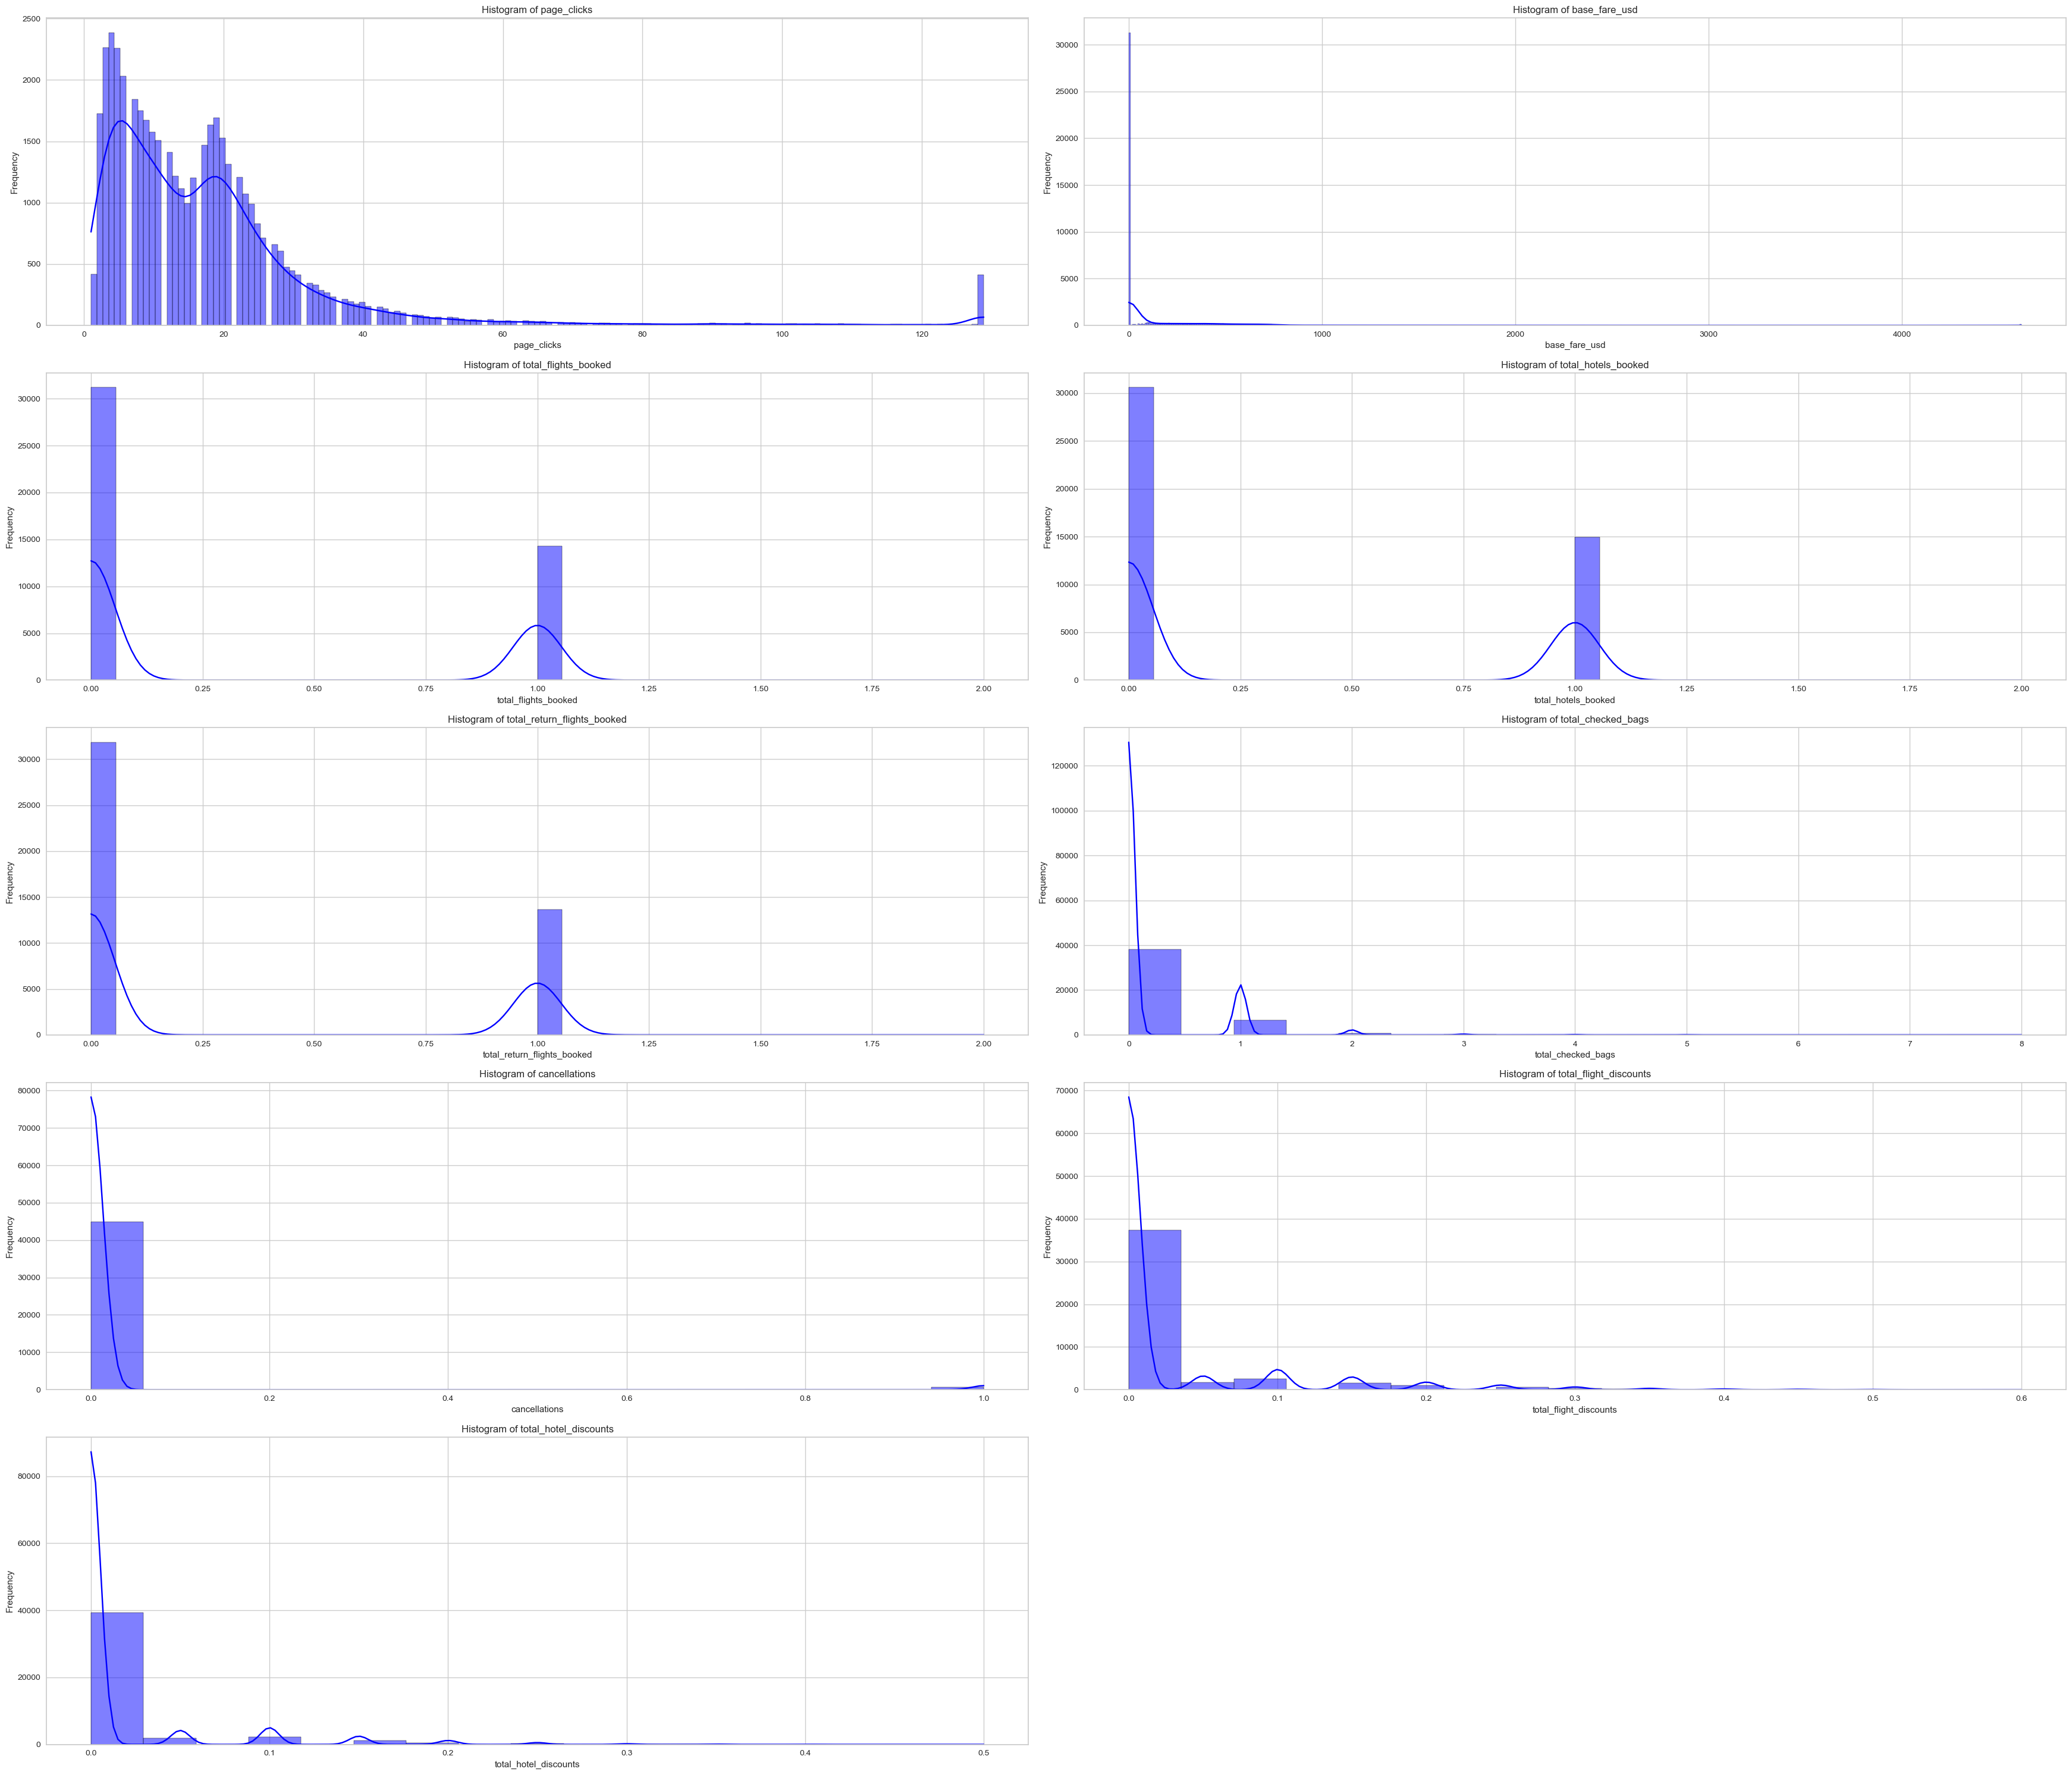

In [27]:

# Plot histograms for each numerical variable
# Define the variables of interest
variables_of_interest = ['page_clicks', 'base_fare_usd', 'total_flights_booked', 'total_hotels_booked', 
                         'total_return_flights_booked', 'total_checked_bags', 'cancellations', 
                         'total_flight_discounts', 'total_hotel_discounts']

# Set larger figure size for better visibility
plt.figure(figsize=(35, 30))

# Plot histograms for each variable
for i, var in enumerate(variables_of_interest):
    plt.subplot(5, 2, i+1)  # Adjust the grid size based on the number of variables
    sns.histplot(clean_df[var], kde=True, color='blue')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



#### Page Clicks (page_clicks):
The distribution remains right-skewed, which is typical for page interaction data. Most sessions involve few clicks, which could imply quick engagements or possibly a need to optimize navigation further.
#### Base Fare (base_fare_usd):
The distribution of base fares is highly right-skewed with several extreme values, indicating a few very expensive bookings. It's worth considering whether these are luxury bookings or outliers that need further investigation.
#### Total Flights Booked (total_flights_booked):
The distribution shows that most users book no or one flight, with a small number booking more. This data might be used to identify frequent travelers or potential high-value customers.
#### Total Hotels Booked (total_hotels_booked):
Similar to flight bookings, most bookings involve few hotels. This consistency suggests that users generally plan simple trips involving few accommodations.
#### Total Return Flights Booked (total_return_flights_booked):
The majority of users do not book return flights, which could be explored to understand one-way versus round-trip preferences.
#### Total Checked Bags (total_checked_bags):
Most users travel with few to no checked bags, suggesting a preference for light travel or the potential for incentivizing bag check-ins as a perk.
#### Cancellations (cancellations):
Cancellations are rare, which is typical in travel data but important for understanding risk and customer satisfaction.
#### Total Flight Discounts (total_flight_discounts):
Discount distribution is skewed towards lower values, which might indicate a conservative discount strategy.
#### Total Hotel Discounts (total_hotel_discounts):
Similar to flight discounts, most users receive lower hotel discounts, suggesting room for more aggressive or targeted promotional strategies.

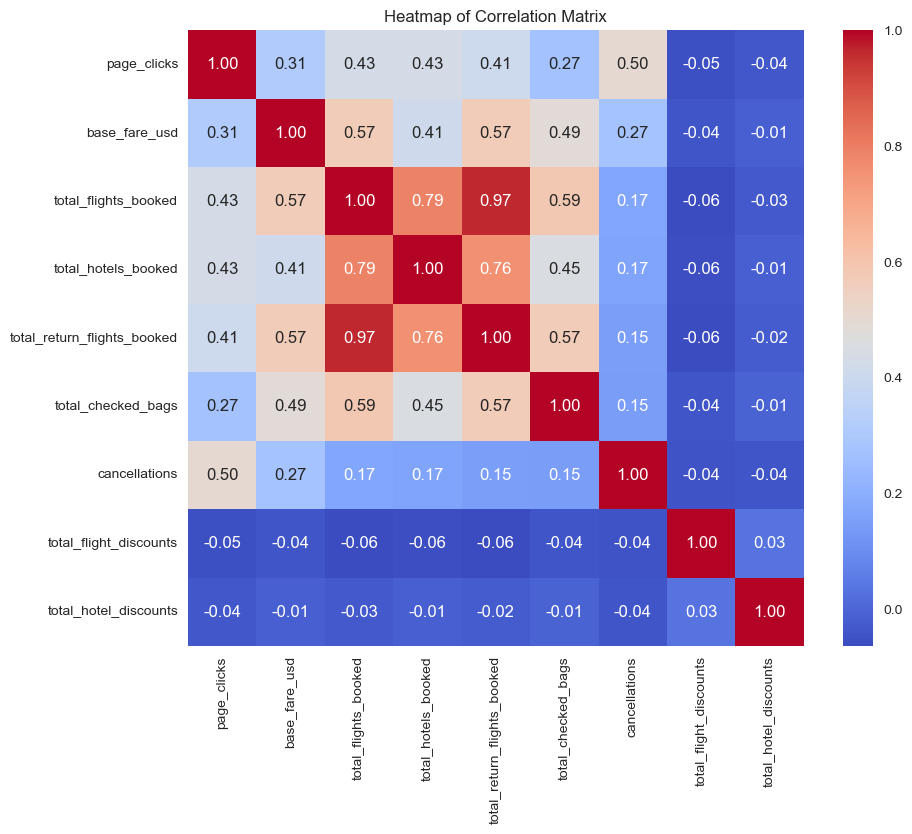

In [28]:
# visualising the correlations between different variables
# Select only the numerical columns for correlation matrix
numerical_cols = ['page_clicks', 'base_fare_usd', 'total_flights_booked', 'total_hotels_booked',
                  'total_return_flights_booked', 'total_checked_bags', 'cancellations',
                  'total_flight_discounts', 'total_hotel_discounts']

# Compute the correlation matrix
corr =clean_df[numerical_cols].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

#### Key Insights from the Heatmap:
**High Correlations:**

**"total_flights_booked"** has a very high correlation with **"total_return_flights_booked"** (0.97) and a strong correlation with **"total_hotels_booked"** (0.79). This suggests that customers who book flights are likely to book round trips and also tend to book hotels, indicating a common pattern of combined travel arrangements.
**"total_flights_booked"**, **"total_hotels_booked"**, and **"total_return_flights_booked"** all show moderate to strong correlations with each other, reinforcing the notion that these elements are often part of the same travel packages.
Moderate Correlations:

**"page_clicks"** correlates moderately with **"total_flights_booked"**, **"total_hotels_booked"**, and **"total_return_flights_booked"** (around 0.43). This may imply that higher engagement on the platform (as measured by page clicks) leads to higher booking rates, suggesting that engaging users more effectively could increase bookings.
**"cancellations"** show a moderate correlation with **"page_clicks"** (0.50), suggesting that sessions with more page clicks might also involve more cancellations, possibly indicating user uncertainty or comparison shopping.
Low or Negative Correlations:

Discounts (**"total_flight_discounts"** and **"total_hotel_discounts"**) show very little to no correlation with booking behaviors. This might indicate that the current discount strategies are not directly influencing the booking volumes, or that discounts are not targeted effectively.
**"total_checked_bags"** shows less correlation with bookings compared to other variables, but still maintains a moderate relationship with **"total_flights_booked"** and **"total_return_flights_booked"** (around 0.59 and 0.57 respectively), which could suggest opportunities for promoting additional services related to luggage for flights.

#<a id="5"></a>
## <p style="background-color:#F29631; font-family:newtimeroman; color:#375458; font-size:150%; text-align:center; border-radius:10px 10px;">Feature Engineering</p>
### Features Generation
**In order to proceed there are certain features that are needed for better analysis. 
I will generate them here.**

I create the **"Avg_checked_bags"** for each user from **"total_checked_bag"**.  Also **" Avg_flight_discount_amount"** for each customer from **"total_flight_discounts"**. The **"Avg_base_fare"** for each customer from **"base_fare_usd"**. And **"Avg_hotel_discount_amount"** from **"total_hotel_discount"**. The **"Avg_page_clicks"** from **"Page_clicks"**, **"Avg_Flight_booked"** from **"total_flight_booKed"**

In [29]:

# df = pd.read_csv('/path/to/your/data.csv')

# Calculate average checked bags per user
clean_df['Avg_checked_bags'] = clean_df.groupby('user_id')['total_checked_bags'].transform('mean')

# Calculate average flight discount per user
clean_df['Avg_flight_discount_amount'] = clean_df.groupby('user_id')['total_flight_discounts'].transform('mean')

# Calculate average base fare per user
clean_df['Avg_base_fare'] = clean_df.groupby('user_id')['base_fare_usd'].transform('mean')

# Calculate average hotel discount per user
clean_df['Avg_hotel_discount_amount'] = clean_df.groupby('user_id')['total_hotel_discounts'].transform('mean')

# Calculate average page click per user
clean_df['Avg_page_clicks'] = clean_df.groupby('user_id')['page_clicks'].transform('mean')

# Calculate average cancellations per user
clean_df['cancellations_ratio'] = clean_df.groupby('user_id')['cancellations'].transform('mean')

# Calculate average flight booked per user
clean_df['Avg_flights_booked'] = clean_df.groupby('user_id')['total_flights_booked'].transform('mean')

# Calculate average cancellations per user
clean_df['Avg_hotels_booked'] = clean_df.groupby('user_id')['total_hotels_booked'].transform('mean')

# Check the new features
print(clean_df[['user_id', 'Avg_checked_bags', 'Avg_flight_discount_amount', 'Avg_base_fare', 'Avg_hotel_discount_amount','Avg_page_clicks','Avg_flights_booked','cancellations_ratio','Avg_hotels_booked']].head())



   user_id  Avg_checked_bags  Avg_flight_discount_amount  Avg_base_fare  \
0    23557               0.0                         0.0            0.0   
1    23557               0.0                         0.0            0.0   
2    23557               0.0                         0.0            0.0   
3    23557               0.0                         0.0            0.0   
4    23557               0.0                         0.0            0.0   

   Avg_hotel_discount_amount  Avg_page_clicks  Avg_flights_booked  \
0                    0.04375            10.25                 0.0   
1                    0.04375            10.25                 0.0   
2                    0.04375            10.25                 0.0   
3                    0.04375            10.25                 0.0   
4                    0.04375            10.25                 0.0   

   cancellations_ratio  Avg_hotels_booked  
0                  0.0               0.25  
1                  0.0               0.25  
2 

I also extracted the lenght of stay of a customer in a hotel as **"length_of_stay"** derived from **"check_in_time"** and **"check_out_time"**

In [30]:
# Identify invalid date values in check_in_time and check_out_time columns
invalid_check_in = clean_df['check_in_time'].apply(pd.to_datetime, errors='coerce').isna()
invalid_check_out = clean_df['check_out_time'].apply(pd.to_datetime, errors='coerce').isna()

# Display rows with invalid check_in_time or check_out_time
invalid_dates = clean_df[invalid_check_in | invalid_check_out]
invalid_dates[['check_in_time', 'check_out_time']]

,check_in_time,check_out_time


In [31]:
clean_df['check_in_time'] = pd.to_datetime(clean_df['check_in_time'], errors='coerce')
clean_df['check_out_time'] = pd.to_datetime(clean_df['check_out_time'], errors='coerce')

# Calculate the length of stay
clean_df['length_of_stay'] = (clean_df['check_out_time'] - clean_df['check_in_time']).dt.days


#### Calculating the Distance  traveled in Kilometres

In [32]:
# I am using the Haversine formula to calculated 
#First, define the Haversine formula function in Python that can be applied to the DataFrame:
import math

def haversine_distance(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0
    
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Change in coordinates
    delta_lat = lat2 - lat1
    delta_lon = lon2 - lon1
    
    # Haversine formula
    a = math.sin(delta_lat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(delta_lon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    # Distance in kilometers
    distance = R * c
    return distance


In [33]:
# Apply the Haversine function to each row in the DataFrame
clean_df['flight_distance_km'] = clean_df.apply(
    lambda row: haversine_distance(
        row['home_airport_lat'], row['home_airport_lon'], 
        row['destination_airport_lat'], row['destination_airport_lon']
    ), axis=1
)


In [34]:
# Display the first few rows to check the new 'flight_distance_km' column
print(clean_df[['home_airport_lat', 'home_airport_lon', 'destination_airport_lat', 'destination_airport_lon', 'flight_distance_km']].head())


   home_airport_lat  home_airport_lon  destination_airport_lat  \
0            40.777           -73.872                      0.0   
1            40.777           -73.872                      0.0   
2            40.777           -73.872                      0.0   
3            40.777           -73.872                      0.0   
4            40.777           -73.872                      0.0   

   destination_airport_lon  flight_distance_km  
0                      0.0         8657.292009  
1                      0.0         8657.292009  
2                      0.0         8657.292009  
3                      0.0         8657.292009  
4                      0.0         8657.292009  


### Further Exploratory Analysis on the New Features

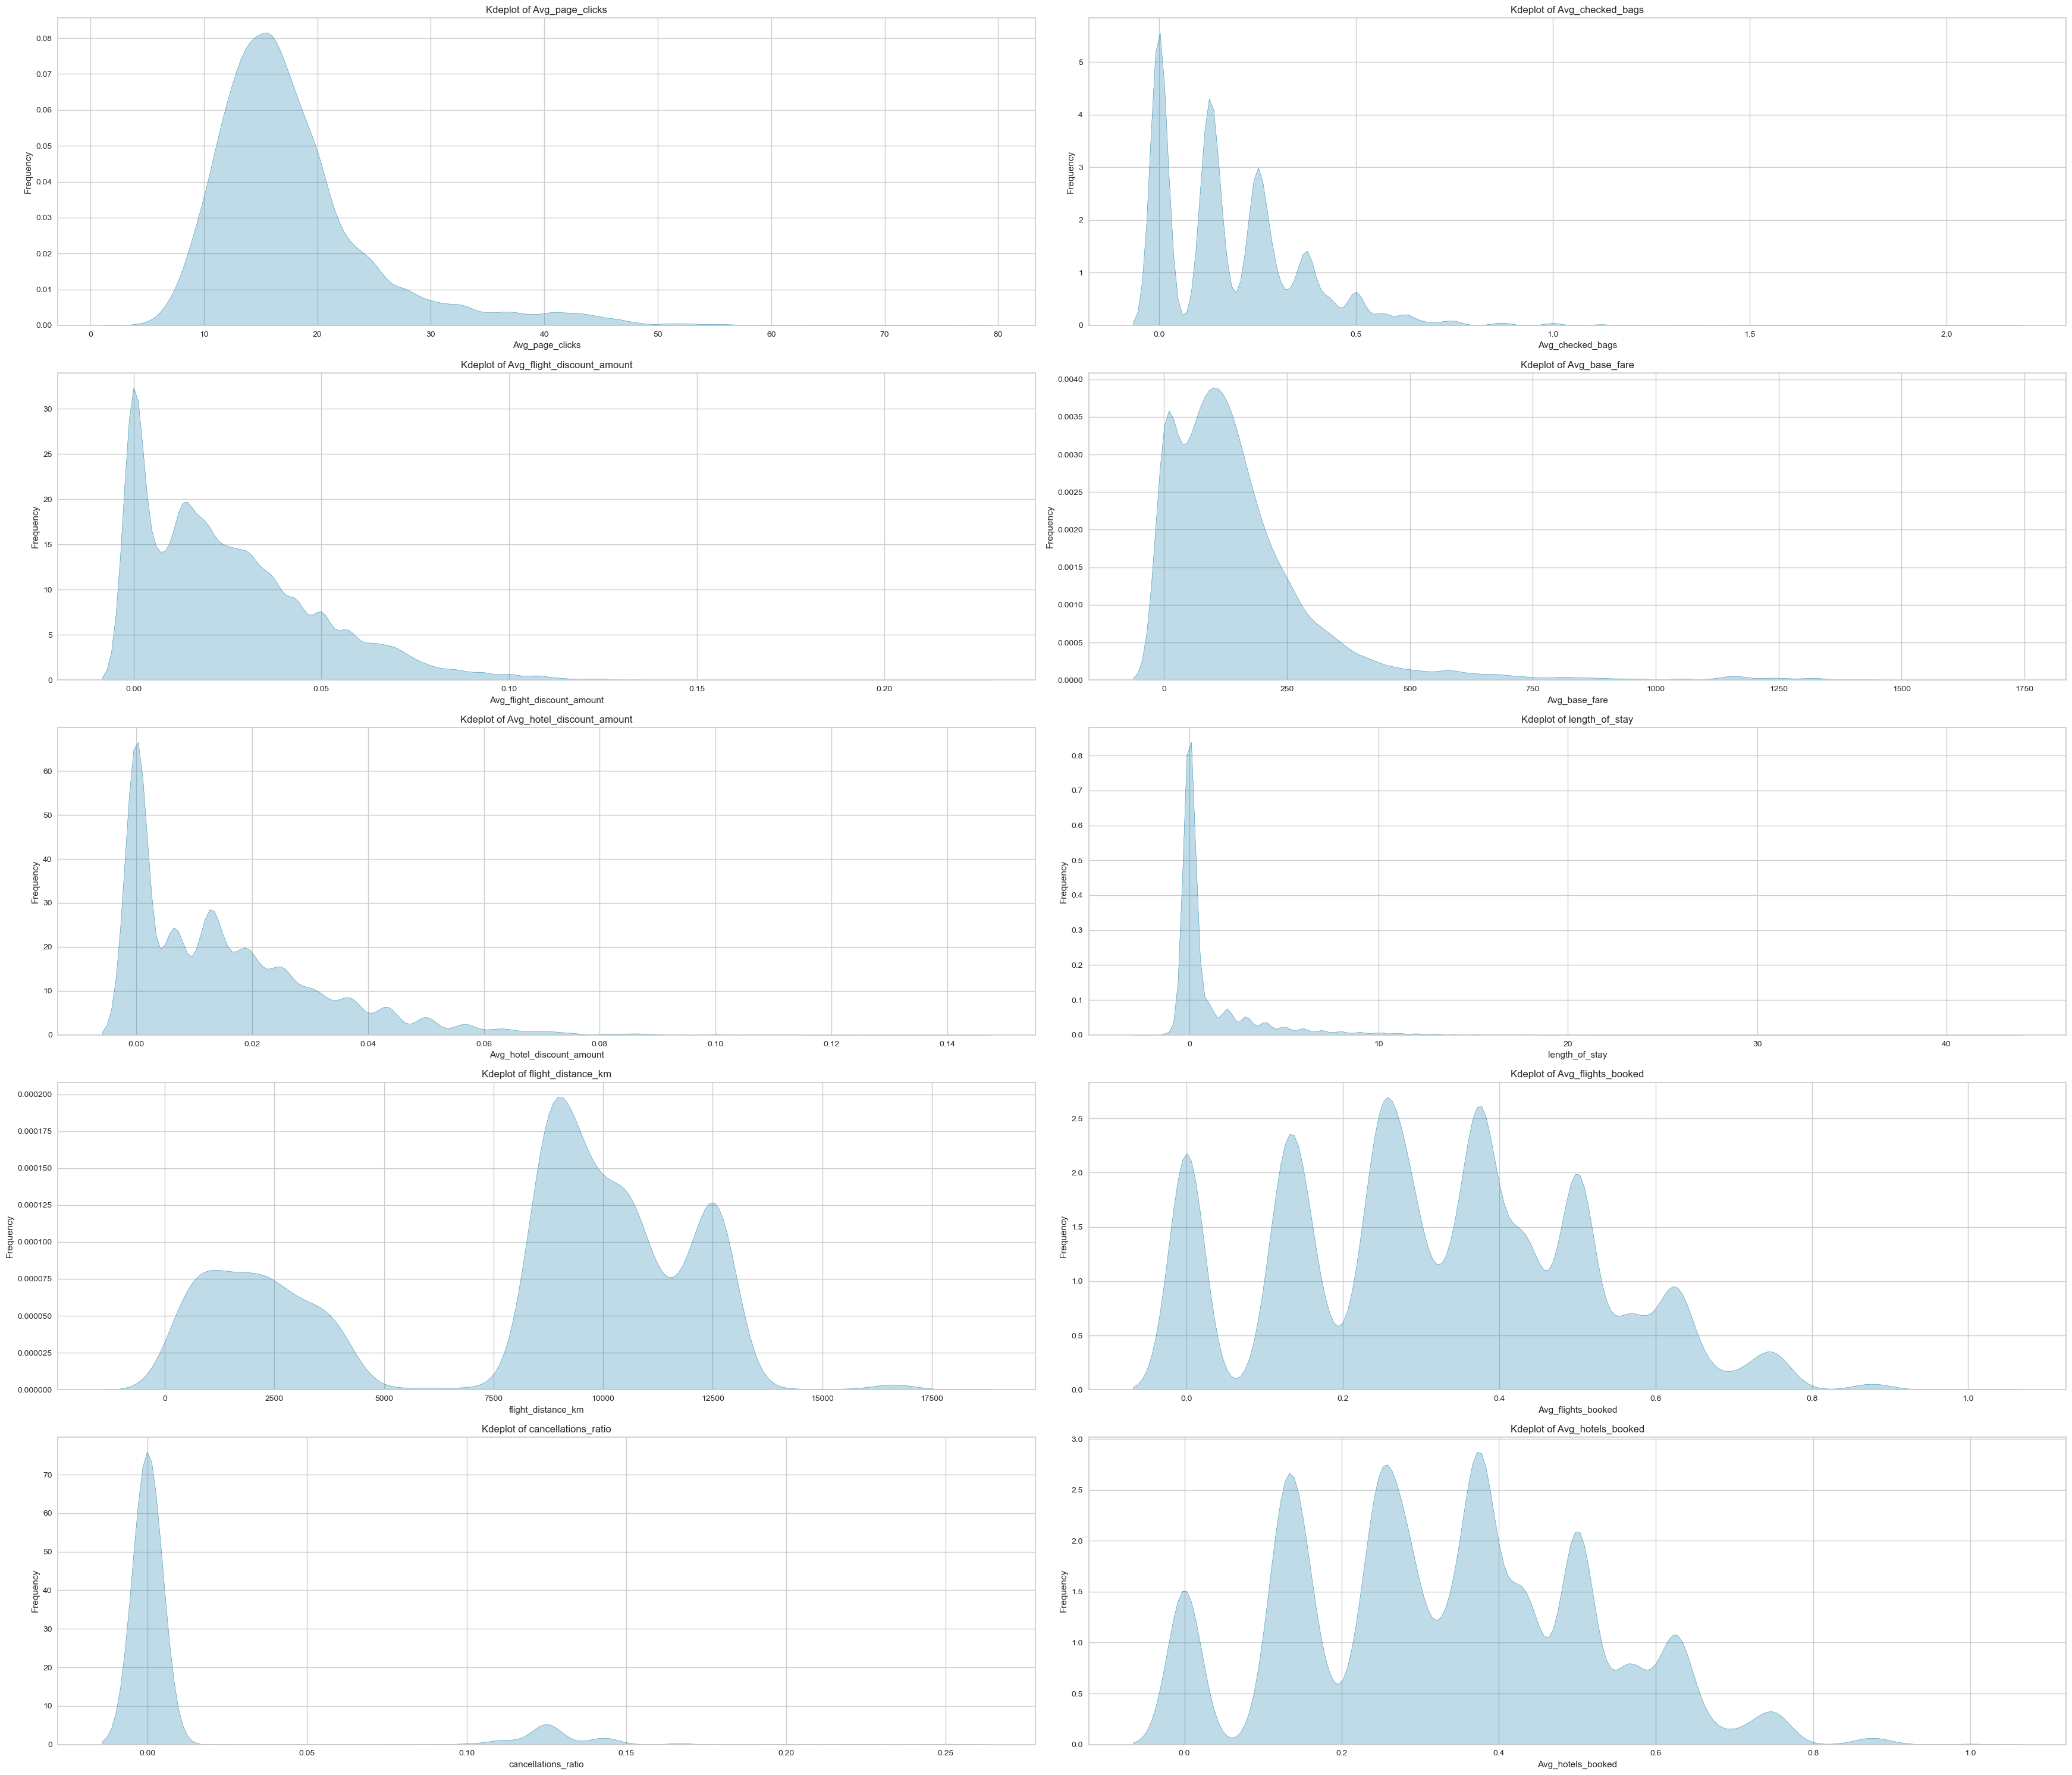

In [35]:
# Plot histograms for each numerical variable
# Define the variables of interest
variables_of_interest = ['Avg_page_clicks', 'Avg_checked_bags', 'Avg_flight_discount_amount', 'Avg_base_fare', 'Avg_hotel_discount_amount', 
                         'length_of_stay', 'flight_distance_km','Avg_flights_booked','cancellations_ratio','Avg_hotels_booked' ]

# Set larger figure size for better visibility
plt.figure(figsize=(35, 30))

# Plot histograms for each variable
for i, var in enumerate(variables_of_interest):
    plt.subplot(5, 2, i+1)  # Adjust the grid size based on the number of variables
    sns.kdeplot(clean_df[var], fill=True)
    plt.title(f'Kdeplot of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



1. **KDE of Avg_Page_Clicks**:shows the distribution of the average number of page clicks by customers.It is right-skewed, with most customers having an average page click count between 5 and 25. There is a long tail extending to higher page clicks, indicating that a smaller subset of customers click on many pages, possibly indicating high engagement or difficulty finding what they are looking for.

2. **KDE of Avg_Checked_Bags**:shows the distribution of the average number of checked bags by customers. It is heavily right-skewed with multiple peaks. Most customers have close to zero checked bags on average. There are distinct peaks around 0.1, 0.6, and 1.1, suggesting that while the majority rarely check bags, there are segments that consistently check one or two bags. The distinct peaks in this plot suggest specific segments that would highly value free checked bags.

3. **KDE of Avg_Base_Fare**: shows the distribution of the average base fare paid by customers.It is a right-skewed distribution with two peaks, one around 100 dollars and another around 200-300 dollars. Most customers spend under 300 dollars on average, but there is a long tail with some customers spending significantly more, potentially indicating premium travelers. The variation in average base fare indicates different spending capacities. High spenders might appreciate perks like no cancellation fees or one night free hotel with flight, while budget travelers might prefer free checked bags or discounts.

4. **KDE of Avg_Flight_Discount_Amount**: shows the distribution of the average flight discount amount used by customers.It is right-skewed with most customers using very little to no discount, but there is a noticeable tail extending towards higher discount amounts, indicating that some customers frequently take advantage of discounts.The skewness in flight and hotel discount usage indicates that while most customers use minimal discounts, a notable segment makes significant use of them. Tailoring promotions based on discount usage could enhance retention.


5. **KDE of Avg_Hotel_Discount_Amount**:shows the distribution of the average hotel discount amount used by customers. Similar to flight discounts, this distribution is right-skewed. Most customers use minimal hotel discounts, but there is a significant number that utilizes discounts more heavily.

6. **KDE of Length_of_Stay**:shows the distribution of the length of stay for customers. it is right-skewed, with a sharp peak at 2 days, indicating that short stays are most common. There is a gradual decline, showing that longer stays are less frequent but still present.The sharp peak at 2 days stay suggests that short-term perks (like free hotel meals) could appeal to the majority, but longer stay perks could be targeted at those in the tail end of the distribution.


7. **KDE of Avg_Distance_Km**:This plot shows the distribution of the average distance traveled by customers in kilometers.The distribution shows multiple peaks. There is an initial peak around short distances (likely domestic travel) and several peaks at higher distances, suggesting a mix of domestic and international travelers. The spread indicates diverse travel preferences and patterns among customers.



### Bivariate Analysis

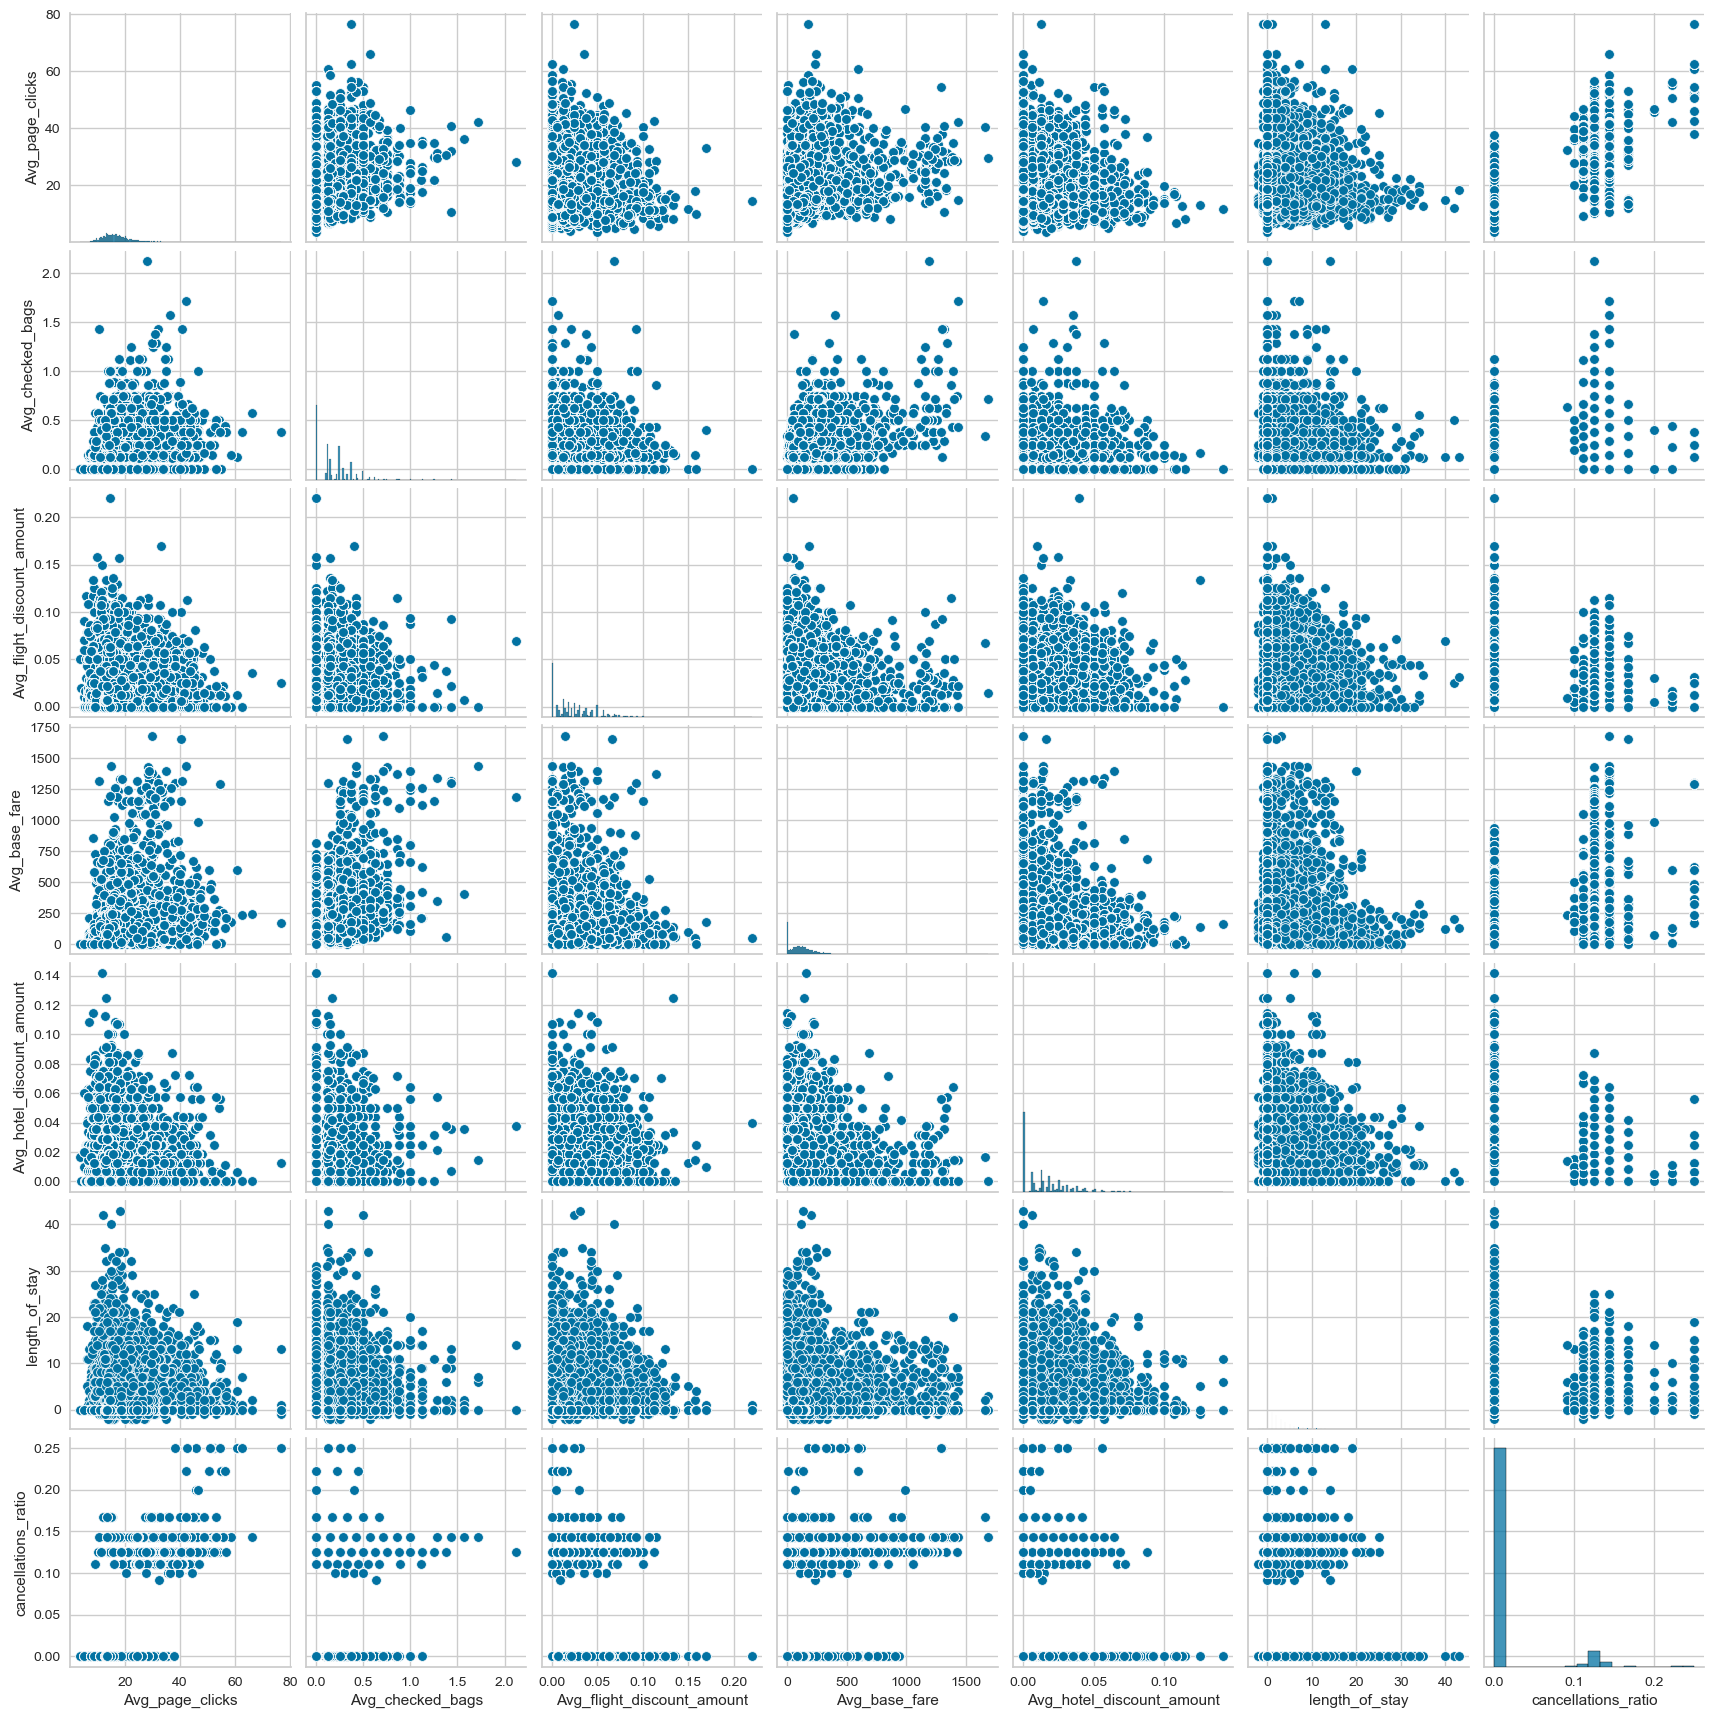

In [36]:
# comparing the features created to get further insights.
# I used pairplot to do a bivariate Anlysis
var_of_int = ['Avg_page_clicks', 'Avg_checked_bags', 'Avg_flight_discount_amount', 'Avg_base_fare', 'Avg_hotel_discount_amount', 
                         'length_of_stay','cancellations_ratio' ]
sns.pairplot(clean_df[var_of_int])
plt.show()


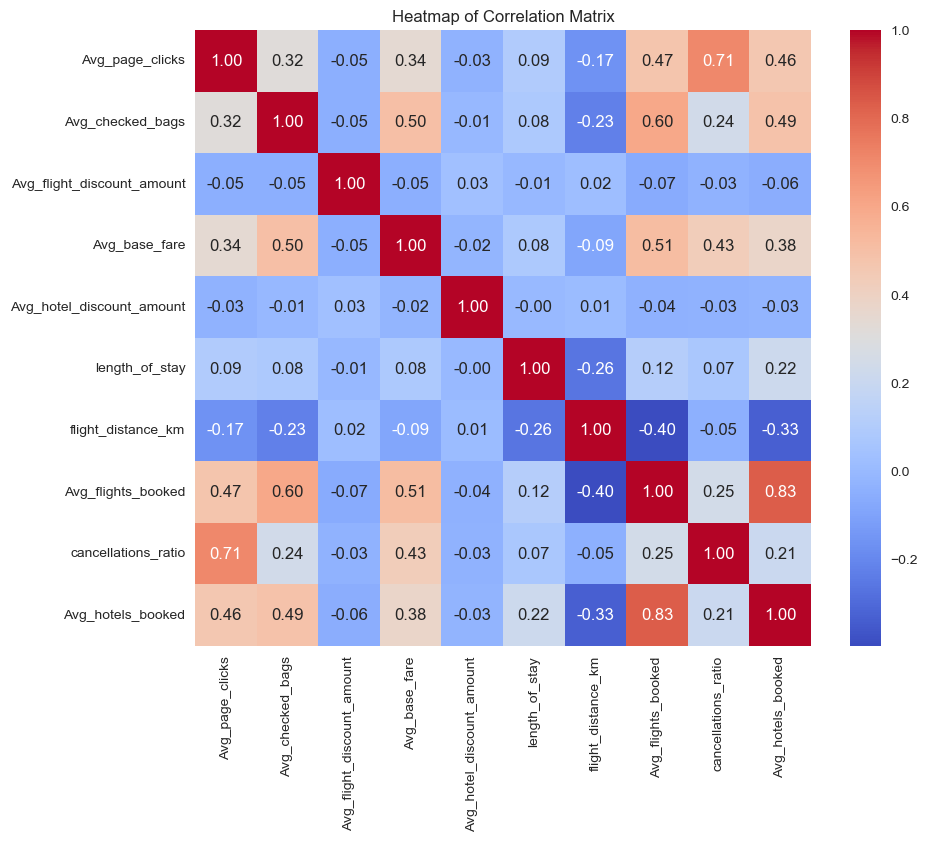

In [37]:
# visualising the correlations between new features
# Select only the numerical columns for correlation matrix
new_cols = ['Avg_page_clicks', 'Avg_checked_bags', 'Avg_flight_discount_amount', 'Avg_base_fare', 'Avg_hotel_discount_amount', 
                         'length_of_stay', 'flight_distance_km','Avg_flights_booked','cancellations_ratio','Avg_hotels_booked' ]


# Compute the correlation matrix
corr =clean_df[new_cols].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

Avg_Page_Clicks:

Positively correlated with:
Avg_Checked_Bags (0.32): Customers who click more pages tend to check more bags.
Avg_Base_Fare (0.34): Higher page clicks are associated with higher average base fares.
Avg_Flights_Booked (0.47): More page clicks correlate with more flights booked.
Cancellations_Ratio (0.71): Higher page clicks have a strong positive correlation with the cancellation ratio, suggesting that customers who browse more may also cancel more frequently.
Avg_Hotels_Booked (0.46): More page clicks are associated with more hotels booked.
Negatively correlated with:
Flight_Distance_Km (-0.17): Customers who click more pages tend to travel shorter distances.
Avg_Checked_Bags:

Positively correlated with:
Avg_Base_Fare (0.50): More checked bags correlate with higher base fares.
Avg_Flights_Booked (0.60): Customers who check more bags tend to book more flights.
Avg_Hotels_Booked (0.49): More checked bags correlate with more hotels booked.
Negatively correlated with:
Flight_Distance_Km (-0.23): Customers who check more bags tend to travel shorter distances.
Avg_Flight_Discount_Amount:

The correlations are generally weak with other variables, indicating that flight discount usage doesn't strongly correlate with other features.
Avg_Base_Fare:

Positively correlated with:
Avg_Flights_Booked (0.51): Higher base fares are associated with more flights booked.
Avg_Hotels_Booked (0.38): Higher base fares correlate with more hotels booked.
Weak or no significant negative correlations.
Avg_Hotel_Discount_Amount:

Weak correlations with other features, similar to flight discount amounts.
Length_of_Stay:

Weak correlations with most features, suggesting that the length of stay is relatively independent of the other variables.
Flight_Distance_Km:

Negatively correlated with:
Avg_Page_Clicks (-0.17): Longer distances correlate with fewer page clicks.
Avg_Checked_Bags (-0.23): Longer distances correlate with fewer checked bags.
Avg_Base_Fare (-0.09): Slight negative correlation with base fare.
Avg_Flights_Booked (-0.40): Longer distances correlate with fewer flights booked.
Avg_Hotels_Booked (-0.33): Longer distances correlate with fewer hotels booked.
Weak or no significant positive correlations.
Avg_Flights_Booked:

Positively correlated with:
Avg_Page_Clicks (0.47)
Avg_Checked_Bags (0.60)
Avg_Base_Fare (0.51)
Avg_Hotels_Booked (0.83): Very strong positive correlation with hotels booked.
Negatively correlated with:
Flight_Distance_Km (-0.40)
Cancellations_Ratio:

Positively correlated with:
Avg_Page_Clicks (0.71)
Avg_Base_Fare (0.43)
Avg_Flights_Booked (0.25)
Avg_Hotels_Booked:

Positively correlated with:
Avg_Page_Clicks (0.46)
Avg_Checked_Bags (0.49)
Avg_Base_Fare (0.38)
Avg_Flights_Booked (0.83)
Negatively correlated with:
Flight_Distance_Km (-0.33)

**Insights**
High Engagement and Cancellations: Customers with high average page clicks tend to cancel more often. This group might benefit from perks that reduce the hassle of cancellations, such as no cancellation fees.
Checked Bags and High Spenders: There is a strong correlation between checked bags and higher base fares. Offering free checked bags might be particularly appealing to high spenders.
Frequent Travelers: Customers who book more flights and hotels might value exclusive discounts and loyalty rewards. They are also likely to have higher page clicks.
Discount Utilizers: Although the correlation with discounts is generally weak, identifying frequent users of flight and hotel discounts can help tailor targeted discount-based perks.
Short vs. Long Distance Travelers: There are distinct behaviors between short and long-distance travelers. Short-distance travelers tend to click more pages and book more flights, indicating they might value quick booking perks, while long-distance travelers might appreciate comfort-related perks like free checked bags and hotel meals.

## Calculating Matrics for Exclusive Discounts
From the analysis above, it was observed that the Average Flight Discount Amount, which could be a key indicator for customers interested in Exclusive Discounts, shows generally weak correlations with other variables. To better understand customer behavior and preferences, a new metric, Average Dollar Spent per Kilometer (ADS_PER_KM), was created for further analysis.

In [38]:
#Step 1: Calculate ADS
# Ensure 'total_flight_discounts' is treated as a total dollar amount. If it's a percentage, adjust the calculation as needed.
clean_df['dollars_saved'] = clean_df['total_flight_discounts'] * clean_df['base_fare_usd']

# Group by 'user_id' and calculate mean dollars saved (ADS)
ads = clean_df.groupby('user_id')['dollars_saved'].mean().reset_index(name='ADS')

# Merge ADS back to the main DataFrame on 'user_id'
clean_df = clean_df.merge(ads, on='user_id', how='left')

# Step 2: Apply MinMax Scaling
scaler = MinMaxScaler()
clean_df['scaled_ADS'] = scaler.fit_transform(clean_df[['ADS']])  # Ensure scaling is applied correctly

# Display the first few rows to check the new 'scaled_ADS' column
print(clean_df[['user_id', 'dollars_saved', 'ADS', 'scaled_ADS']].head())


   user_id  dollars_saved  ADS  scaled_ADS
0    23557            0.0  0.0         0.0
1    23557            0.0  0.0         0.0
2    23557            0.0  0.0         0.0
3    23557            0.0  0.0         0.0
4    23557            0.0  0.0         0.0


In [39]:
# Calculate the sum of total_flight_discounts
total_flight_discounts = clean_df['total_flight_discounts'].sum()

# Count the total number of entries (rows) in the DataFrame
total_entries = len(clean_df)

# Calculate the proportion of total flight discounts to the number of entries
discount_flight_proportion = total_flight_discounts / total_entries
clean_df['discount_flight_proportion'] = discount_flight_proportion




In [40]:
# Normalizing flight_distance_km using MinMaxScaler
clean_df['scaled_distance'] = scaler.fit_transform(clean_df[['flight_distance_km']])

# compute ADS_per_km using scaled distance
clean_df['ADS_per_km'] = np.where(clean_df['scaled_distance'] > 0,
                                  clean_df['scaled_ADS'] / clean_df['scaled_distance'],
                                  np.nan)

# Display the first few rows to check the 'ADS_per_km' column
print(clean_df[['user_id', 'scaled_ADS', 'flight_distance_km', 'scaled_distance', 'ADS_per_km']].head())



   user_id  scaled_ADS  flight_distance_km  scaled_distance  ADS_per_km
0    23557         0.0         8657.292009         0.496894         0.0
1    23557         0.0         8657.292009         0.496894         0.0
2    23557         0.0         8657.292009         0.496894         0.0
3    23557         0.0         8657.292009         0.496894         0.0
4    23557         0.0         8657.292009         0.496894         0.0


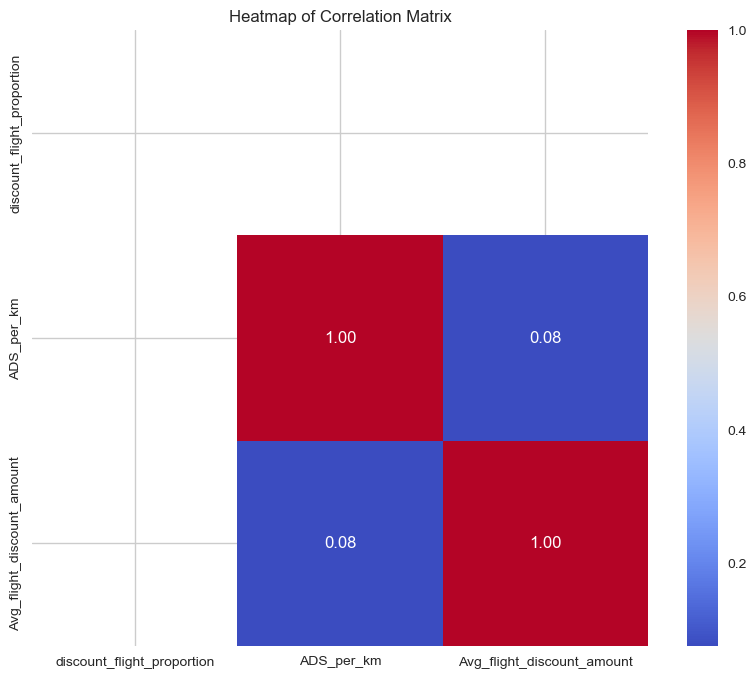

In [41]:
# Select the numerical columns for correlation matrix
numerical_cols = ['discount_flight_proportion', 'ADS_per_km', 'Avg_flight_discount_amount']

# Compute the correlation matrix
corr = clean_df[numerical_cols].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [42]:
# Select only the numerical columns for standardization
numerical_cols = ['ADS_per_km', 'discount_flight_proportion', 'Avg_flight_discount_amount']

# Standardize the numerical columns
scaler = MinMaxScaler()
clean_df[numerical_cols] = scaler.fit_transform(clean_df[numerical_cols])

# Step 2: Calculate bargain_hunter_index
clean_df['bargain_hunter_index'] = clean_df['ADS_per_km'] * clean_df['discount_flight_proportion'] * clean_df['Avg_flight_discount_amount']

# Display the first few rows to check the new 'bargain_hunter_index' column
print(clean_df[['user_id', 'ADS_per_km', 'discount_flight_proportion', 'Avg_flight_discount_amount', 'bargain_hunter_index']].head())

   user_id  ADS_per_km  discount_flight_proportion  \
0    23557         0.0                         0.0   
1    23557         0.0                         0.0   
2    23557         0.0                         0.0   
3    23557         0.0                         0.0   
4    23557         0.0                         0.0   

   Avg_flight_discount_amount  bargain_hunter_index  
0                         0.0                   0.0  
1                         0.0                   0.0  
2                         0.0                   0.0  
3                         0.0                   0.0  
4                         0.0                   0.0  


In [43]:
clean_df.head()


,user_id,sign_up_date,gender,married,has_children,home_country,home_city,home_airport,destination,destination_airport,page_clicks,base_fare_usd,home_airport_lat,home_airport_lon,destination_airport_lat,destination_airport_lon,check_in_time,check_out_time,age,avg_session_length,num_sessions,total_flights_booked,total_hotels_booked,total_return_flights_booked,total_checked_bags,cancellations,total_flight_discounts,total_hotel_discounts,total_rooms_booked,Avg_checked_bags,Avg_flight_discount_amount,Avg_base_fare,Avg_hotel_discount_amount,Avg_page_clicks,cancellations_ratio,Avg_flights_booked,Avg_hotels_booked,length_of_stay,flight_distance_km,dollars_saved,ADS,scaled_ADS,discount_flight_proportion,scaled_distance,ADS_per_km,bargain_hunter_index
0,23557,2021-07-22,F,married,has no children,usa,new york,LGA,0,0,2.0,0.0,40.777,-73.872,0.0,0.0,1970-01-01 00:00:00,1970-01-01 00:00:00,65,0.3,1,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.04375,10.25,0.0,0.0,0.25,0,8657.292009,0.0,0.0,0.0,0.0,0.496894,0.0,0.0
1,23557,2021-07-22,F,married,has no children,usa,new york,LGA,0,0,3.0,0.0,40.777,-73.872,0.0,0.0,1970-01-01 00:00:00,1970-01-01 00:00:00,65,0.4,1,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.04375,10.25,0.0,0.0,0.25,0,8657.292009,0.0,0.0,0.0,0.0,0.496894,0.0,0.0
2,23557,2021-07-22,F,married,has no children,usa,new york,LGA,0,0,5.0,0.0,40.777,-73.872,0.0,0.0,1970-01-01 00:00:00,1970-01-01 00:00:00,65,0.6,1,0,0,0.0,0,0,0.0,0.1,0.0,0.0,0.0,0.0,0.04375,10.25,0.0,0.0,0.25,0,8657.292009,0.0,0.0,0.0,0.0,0.496894,0.0,0.0
3,23557,2021-07-22,F,married,has no children,usa,new york,LGA,0,0,9.0,0.0,40.777,-73.872,0.0,0.0,2023-07-25 11:00:00,2023-08-12 11:00:00,65,1.2,1,0,1,0.0,0,0,0.0,0.0,2.0,0.0,0.0,0.0,0.04375,10.25,0.0,0.0,0.25,18,8657.292009,0.0,0.0,0.0,0.0,0.496894,0.0,0.0
4,23557,2021-07-22,F,married,has no children,usa,new york,LGA,0,0,9.0,0.0,40.777,-73.872,0.0,0.0,1970-01-01 00:00:00,1970-01-01 00:00:00,65,1.2,1,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.04375,10.25,0.0,0.0,0.25,0,8657.292009,0.0,0.0,0.0,0.0,0.496894,0.0,0.0


<a id="6"></a>
## <p style="background-color:#F29631; font-family:newtimeroman; color:#375458; font-size:150%; text-align:center; border-radius:10px 10px;">Scaling and Dimensionality Reduction</p>
**In this section, I will be carrying the following steps to prepare the data for the clustering operations.**

* Convert categorical features into numeric 
* Scaling the features using the standard scaler 
* Creating a subset dataframe for dimensionality reduction



In [45]:
#Defining the numerical  to be scaled from the dataset
features_of_interest = [ 'age', 'num_sessions', 'Avg_page_clicks',
                   'avg_session_length','total_flights_booked','total_hotels_booked','total_return_flights_booked',
                   'total_checked_bags','cancellations', 'cancellations_ratio','Avg_flights_booked',
                   'Avg_hotels_booked','length_of_stay','flight_distance_km','dollars_saved',
                   'ADS','discount_flight_proportion', 'ADS_per_km','bargain_hunter_index']
      
# Create a new DataFrame with the scaled features for the segmentation
metrics = clean_df[features_of_interest]

#Scaling
scaler = StandardScaler()
scaler.fit(metrics)
scaled_metrics = pd.DataFrame(scaler.transform(metrics),columns= metrics.columns )
scaled_metrics.head()
 
 

,age,num_sessions,Avg_page_clicks,avg_session_length,total_flights_booked,total_hotels_booked,total_return_flights_booked,total_checked_bags,cancellations,cancellations_ratio,Avg_flights_booked,Avg_hotels_booked,length_of_stay,flight_distance_km,dollars_saved,ADS,discount_flight_proportion,ADS_per_km,bargain_hunter_index
0,1.949108,-0.271002,-1.034254,-0.264063,-0.677421,-0.698256,-0.654455,-0.396714,-0.116563,-0.333095,-1.615875,-0.419264,-0.420867,0.195956,-0.112435,-0.314542,0.0,-0.098566,0.0
1,1.949108,-0.271002,-1.034254,-0.255303,-0.677421,-0.698256,-0.654455,-0.396714,-0.116563,-0.333095,-1.615875,-0.419264,-0.420867,0.195956,-0.112435,-0.314542,0.0,-0.098566,0.0
2,1.949108,-0.271002,-1.034254,-0.237784,-0.677421,-0.698256,-0.654455,-0.396714,-0.116563,-0.333095,-1.615875,-0.419264,-0.420867,0.195956,-0.112435,-0.314542,0.0,-0.098566,0.0
3,1.949108,-0.271002,-1.034254,-0.185225,-0.677421,1.431568,-0.654455,-0.396714,-0.116563,-0.333095,-1.615875,-0.419264,6.121222,0.195956,-0.112435,-0.314542,0.0,-0.098566,0.0
4,1.949108,-0.271002,-1.034254,-0.185225,-0.677421,-0.698256,-0.654455,-0.396714,-0.116563,-0.333095,-1.615875,-0.419264,-0.420867,0.195956,-0.112435,-0.314542,0.0,-0.098566,0.0


#### Dimensionality Reduction
In this problem, various factors influence the final classification, which are essentially attributes or features. As the number of features increases, it becomes more challenging to manage and analyze them. Many of these features are correlated, leading to redundancy. Therefore, I will perform dimensionality reduction on the selected features before applying a classifier.

**Dimensionality reduction** involves reducing the number of random variables under consideration by obtaining a set of principal variables. This process helps simplify the dataset while retaining its essential information.

**Principal Component Analysis (PCA)** is a widely-used technique for dimensionality reduction, which enhances interpretability while minimizing information loss.

**Steps in this section:**
1. **Dimensionality reduction with PCA**: This step involves applying PCA to reduce the dataset dimensions to three principal components.
2. **Plotting the reduced dataframe**: Visualizing the reduced data to gain insights.

For this project, I will reduce the dimensions to three using PCA.

In [46]:

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
imputed_metrics = imputer.fit_transform(metrics) 
# Scale the metrics
scaler = StandardScaler()
scaled_metrics = scaler.fit_transform(imputed_metrics)

# Initiating PCA to reduce dimensions to 3
pca = PCA(n_components=3)
pca.fit(scaled_metrics)

# Transforming the data and creating a new DataFrame
Reduced_scaled_metrics = pd.DataFrame(pca.transform(scaled_metrics), columns=["col1", "col2", "col3"])

# Display the descriptive statistics of the new PCA dataset
Reduced_scaled_metrics.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,45506.0,6.495534e-17,2.234111,-3.926719,-1.719596,-0.969690,2.144564,15.070142
col2,45506.0,-1.498969e-17,1.496689,-5.348826,-0.782277,-0.097763,0.394976,13.761299
col3,45506.0,7.494847e-18,1.299537,-10.410968,-0.725265,0.001770,0.752272,16.639260


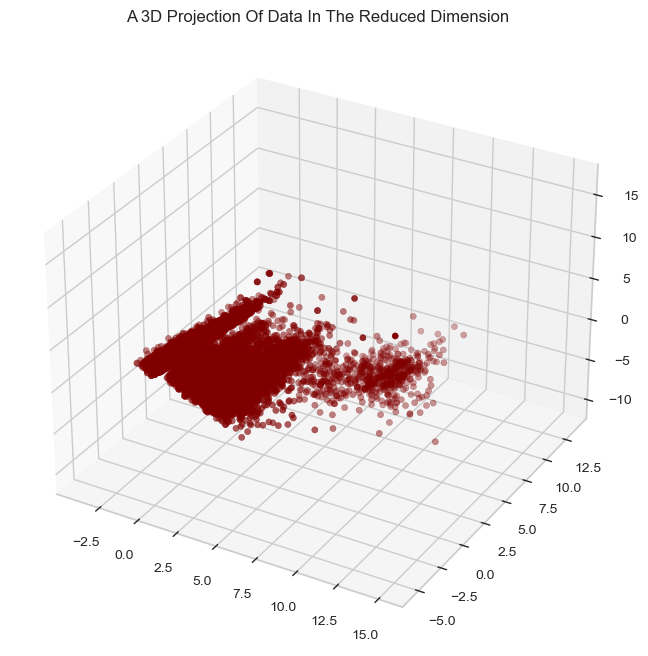

In [47]:
#A 3D Projection Of Data In The Reduced Dimension
x =Reduced_scaled_metrics["col1"]
y =Reduced_scaled_metrics["col2"]
z =Reduced_scaled_metrics["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

<a id="7"></a>
## <p style="background-color:#F29631; font-family:newtimeroman; color:#375458; font-size:150%; text-align:center; border-radius:10px 10px;">Clustering</p>


**I performed the following Steps in the Clustering Process**
* Elbow Method to determine the number of clusters to be formed
* Clustering via Agglomerative Clustering
* Examining the clusters formed via scatter plot

### Elbow Method

Elbow Method to determine the number of clusters to be formed:


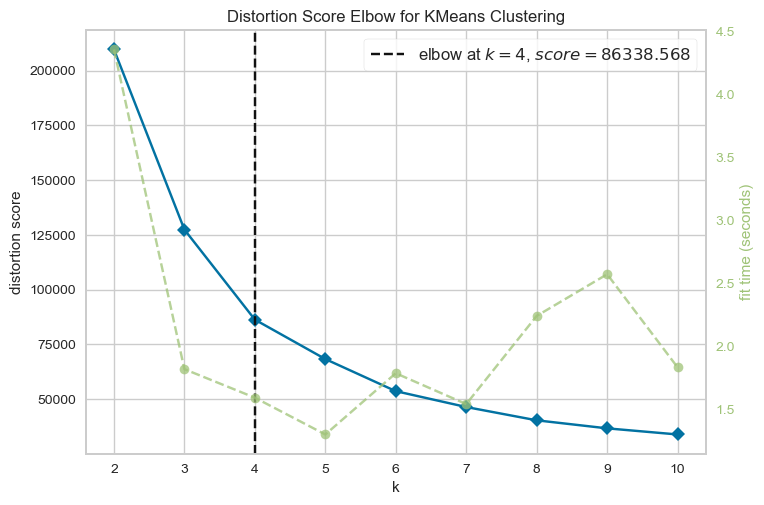

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(Reduced_scaled_metrics)
Elbow_M.show()

 **Explaination of  the elbow graph:**
The black dashed line indicates the elbow point at k=4, with a distortion score of approximately 87730.526.
This suggests that the optimal number of clusters is 4, as adding more clusters beyond this point results in a marginal reduction in distortion score.
Also, notice the green dashed line which represents the fit time in seconds for different values of k.
it shows that the fit time generally increases with the number of clusters. 


### Clustering via KMeans Clustering
I will be fitting the Kmeans Clustering Model to get the final cluster

In [49]:
# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(Reduced_scaled_metrics)
 #Add the Clusters feature to the Reduced_scaled_metrics DataFrame
Reduced_scaled_metrics["Clusters"] = kmeans.labels_
# Adding the Clusters feature to the original dataframe
clean_df["Clusters"] = kmeans.labels_
print('clustering completed')

clustering completed


### Visualizing the Clusters

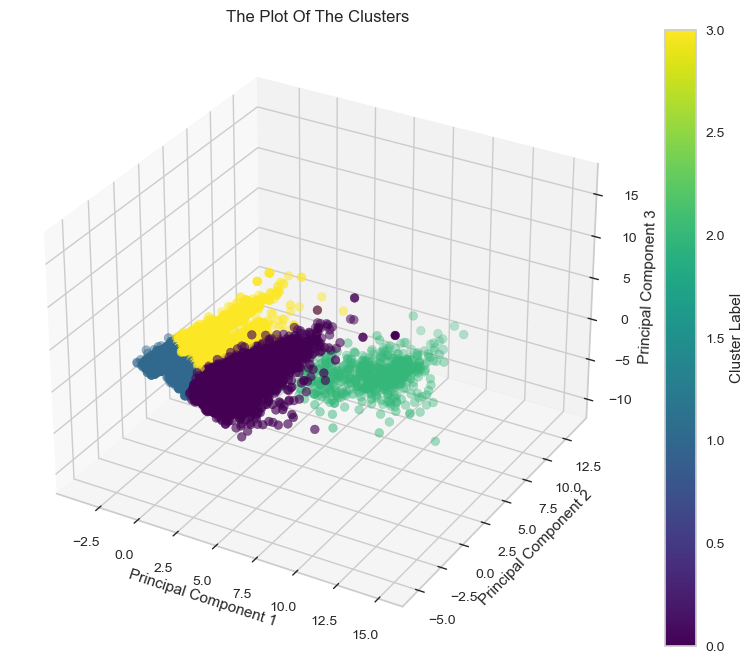

In [50]:
# Extract the principal components or features to plot
x = Reduced_scaled_metrics["col1"]
y = Reduced_scaled_metrics["col2"]
z = Reduced_scaled_metrics["col3"]

# Define the color map for the clusters
cmap = plt.get_cmap("viridis")

# Plotting the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z, s=40, c=Reduced_scaled_metrics["Clusters"], marker='o', cmap=cmap)
ax.set_title("The Plot Of The Clusters")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

# Add color bar for reference
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Cluster Label")

plt.show()

#### Analyzing Each Cluster
To understand the characteristics of each cluster, you can summarize the main statistics or visualize the data

              col1      col2      col3
Clusters                              
0         2.831275 -1.048200  0.000107
1        -1.802315 -0.137719 -0.522967
2         6.277491  8.462196 -6.223179
3        -0.628645  1.028140  1.213693


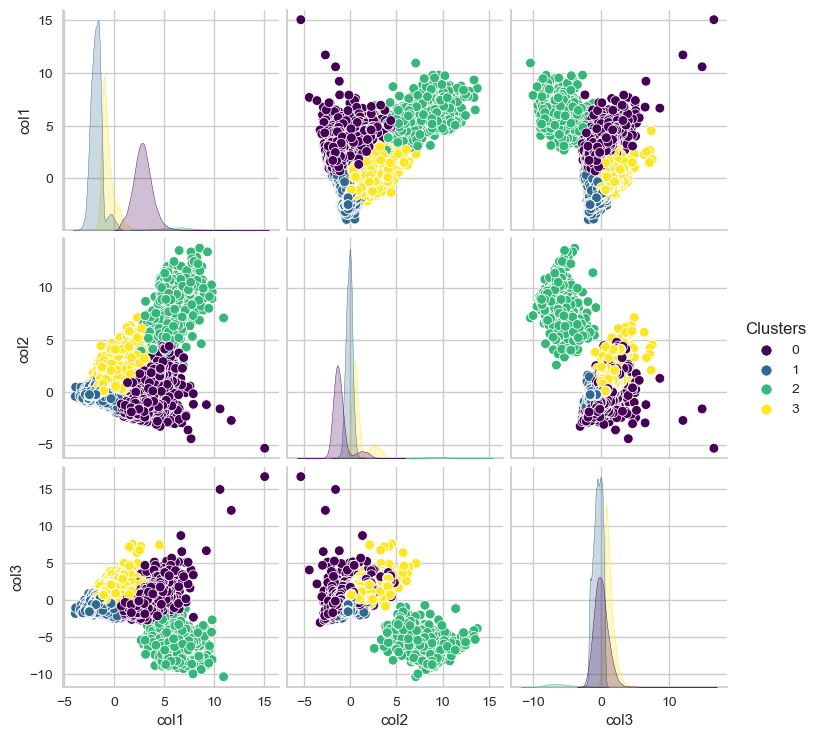

In [51]:
# Summarize cluster characteristics
cluster_summary = Reduced_scaled_metrics.groupby("Clusters").mean()
print(cluster_summary)

# Alternatively, visualize the data
import seaborn as sns

sns.pairplot(Reduced_scaled_metrics, hue='Clusters', palette='viridis')
plt.show()

#### Based on the results of the clustering analysis, we can interpret the characteristics of each cluster and identify the dominant

* Cluster 0 (Purple):

Characteristics: Low values across all components, suggesting potentially budget-conscious customers.
Suggested Perks: Free checked bags.

* Cluster 1 (Blue):

Characteristics: High col1 but low col2 and col3, indicating customers who may spend more on specific aspects (e.g., flights) but less on others.
Suggested Perks: One night free hotel with flight.

* Cluster 2 (Green):

Characteristics: Very high values for col1 and col2, indicating potentially high spenders and frequent travelers.
Suggested Perks: No cancellation fee.

* Cluster 3 (Yellow):

Characteristics: Moderate col1, high col2, highest col3, indicating customers who might value comprehensive packages.
Suggested Perks: Free hotel meals.

#### Personalize Perks for Each Customer:
Assign the likely favorite perk to each customer based on their cluster

In [52]:
# Create a mapping for the perks based on clusters
perks_mapping = {
    0: ["Free checked bags"],
    1: ["One night free hotel with flight"],
    2: ["No cancellation fee"],
    3: ["Free hotel meals"]
}

# Assign perks to each customer based on their cluster
clean_df['Perks'] = clean_df['Clusters'].map(perks_mapping)

# Display the head of the updated DataFrame
print(clean_df[['user_id', 'gender', 'married','has_children','home_country', 'home_city','age','Perks']].head())




   user_id gender  married     has_children home_country home_city  age  \
0    23557      F  married  has no children          usa  new york   65   
1    23557      F  married  has no children          usa  new york   65   
2    23557      F  married  has no children          usa  new york   65   
3    23557      F  married  has no children          usa  new york   65   
4    23557      F  married  has no children          usa  new york   65   

                                Perks  
0  [One night free hotel with flight]  
1  [One night free hotel with flight]  
2  [One night free hotel with flight]  
3  [One night free hotel with flight]  
4  [One night free hotel with flight]  


<a id="8"></a>
## <p style="background-color:#F29631; font-family:newtimeroman; color:#375458; font-size:150%; text-align:center; border-radius:10px 10px;">Thresholding</p>
We now have 4 perks.
1) Free checked bags
2) One night free hotel with flight
3) No cancellation fee
4) Free hotel meals
 To get the fifth perk which is exclusive discount. I used thresholding which involvled selecting customers based on cut-off points of one or more behavioral metrics. I chose only two metrics- the bargain_hunter_index and avg_session_length. We chose  threshold conditions. 
 **Our Threshold Conditions are 
 1) Bargain hunter index > 0.01
 2) Average Session Length is greater than 2


In [53]:
# Define the condition for Exclusive Discounts
condition4 = ((clean_df['bargain_hunter_index'] > 0.01) &
              (clean_df['avg_session_length'] > 2))

# Perk to assign
Perks = 'Exclusive Discounts'

# Assign the perk label based on condition 4
clean_df.loc[condition4, 'Perks'] = Perks

# Display the head of the updated DataFrame to verify
print(clean_df[['user_id', 'gender', 'married', 'has_children', 'home_country', 'home_city', 'age', 'Perks']].head())

   user_id gender  married     has_children home_country home_city  age  \
0    23557      F  married  has no children          usa  new york   65   
1    23557      F  married  has no children          usa  new york   65   
2    23557      F  married  has no children          usa  new york   65   
3    23557      F  married  has no children          usa  new york   65   
4    23557      F  married  has no children          usa  new york   65   

                                Perks  
0  [One night free hotel with flight]  
1  [One night free hotel with flight]  
2  [One night free hotel with flight]  
3  [One night free hotel with flight]  
4  [One night free hotel with flight]  


<a id="9"></a>
## <p style="background-color:#F29631; font-family:newtimeroman; color:#375458; font-size:150%; text-align:center; border-radius:10px 10px;">Fuzzy Segmentation</p>


Based on how Elena framed the rewards program perks, each customer should be mapped to precisely one perk.
We use **Fuzzy Segmentation**

To implement fuzzy segmentation we can follow these steps:

Ordering and Ranking for Each Perk: For each perk, order the customers by their affinity metric (perk index) and assign ranks.
Calculate Minimum Rank Across Perks: For each customer, calculate the minimum rank across all the perks to determine their most affiliated perk.
Assign the Most Preferred Perk: Assign the customer to the perk corresponding to their minimum rank.

This approach ensures that each customer is assigned the perk they have the highest affinity for, based on the minimum rank across all perks.

#### STEP 1
**Ranking users in each Perk**

In [54]:
# Ranking for the free checked bags Perk
# Generate synthetic affinity metric for Free Checked Bags
clean_df['free_checked_bags_index'] = clean_df['total_checked_bags'] + clean_df['flight_distance_km'] 

# Rank users based on free_checked_bags_index
clean_df['free_checked_bags'] = clean_df.groupby('Clusters')['free_checked_bags_index'].rank(method='first', ascending=False).astype(int)

# Print the result to see the ranking
print(clean_df[['user_id', 'Clusters', 'free_checked_bags_index', 'free_checked_bags']].head())


   user_id  Clusters  free_checked_bags_index  free_checked_bags
0    23557         1              8657.292009              16900
1    23557         1              8657.292009              16901
2    23557         1              8657.292009              16902
3    23557         1              8657.292009              16903
4    23557         1              8657.292009              16904


In [56]:
# Ranking for Free hotel meals Perk
# Generate synthetic affinity metric for Free Hotel Meals
clean_df['free_hotel_meals_index'] = clean_df['length_of_stay'] + clean_df['total_hotels_booked'] +clean_df['total_rooms_booked']

# Rank users based on free_hotel_meals_index
clean_df['free_hotel_meals'] = clean_df.groupby('Clusters')['free_hotel_meals_index'].rank(method='first', ascending=False).astype(int)

# Print the result to see the ranking
print(clean_df[['user_id', 'Clusters', 'free_hotel_meals_index', 'free_hotel_meals','free_checked_bags']].head())


   user_id  Clusters  free_hotel_meals_index  free_hotel_meals  \
0    23557         1                     0.0              1273   
1    23557         1                     0.0              1274   
2    23557         1                     0.0              1275   
3    23557         1                    21.0                19   
4    23557         1                     0.0              1276   

   free_checked_bags  
0              16900  
1              16901  
2              16902  
3              16903  
4              16904  


In [58]:
# Ranking for the No cancellation fee Perk
# Generate synthetic affinity metric for No Cancellation Fees
clean_df['no_cancellation_fee_index'] = clean_df['cancellations_ratio'] +  clean_df['Avg_page_clicks']

# Rank users based on no_cancellation_fee_index
clean_df['no_cancellation_fee'] = clean_df.groupby('Clusters')['no_cancellation_fee_index'].rank(method='first', ascending=False).astype(int)

# Print the result to see the ranking
print(clean_df[['user_id', 'Clusters', 'no_cancellation_fee_index', 'no_cancellation_fee','free_hotel_meals','free_checked_bags']].head())


   user_id  Clusters  no_cancellation_fee_index  no_cancellation_fee  \
0    23557         1                      10.25                16531   
1    23557         1                      10.25                16532   
2    23557         1                      10.25                16533   
3    23557         1                      10.25                16534   
4    23557         1                      10.25                16535   

   free_hotel_meals  free_checked_bags  
0              1273              16900  
1              1274              16901  
2              1275              16902  
3                19              16903  
4              1276              16904  


In [60]:
# Ranking for the One Night Free Hotel Perks
# Generate synthetic affinity metric for One Night Free Hotel
clean_df['one_night_free_hotel_index'] = clean_df['total_flights_booked'] + clean_df['length_of_stay'] 

# Rank users based on one_night_free_hotel_index
clean_df['one_night_free_hotel'] = clean_df.groupby('Clusters')['one_night_free_hotel_index'].rank(method='first', ascending=False).astype(int)

# Print the result to see the ranking
print(clean_df[['user_id', 'Clusters', 'one_night_free_hotel_index', 'one_night_free_hotel','no_cancellation_fee_index', 'no_cancellation_fee','free_hotel_meals','free_checked_bags']].head())


   user_id  Clusters  one_night_free_hotel_index  one_night_free_hotel  \
0    23557         1                           0                  1328   
1    23557         1                           0                  1329   
2    23557         1                           0                  1330   
3    23557         1                          18                    18   
4    23557         1                           0                  1331   

   no_cancellation_fee_index  no_cancellation_fee  free_hotel_meals  \
0                      10.25                16531              1273   
1                      10.25                16532              1274   
2                      10.25                16533              1275   
3                      10.25                16534                19   
4                      10.25                16535              1276   

   free_checked_bags  
0              16900  
1              16901  
2              16902  
3              16903  
4            

In [66]:
# Ranking for the Exclusive Discount Perk
# Generate synthetic affinity metric for Exclusive Discount
clean_df['bargain_hunter_index'] = clean_df['Avg_hotel_discount_amount'] * clean_df['Avg_flight_discount_amount']+ clean_df['avg_session_length']+ clean_df['ADS']
# Assuming bargain_hunter_index is already available
clean_df['Exclusive_Discount'] = clean_df.groupby('Clusters')['bargain_hunter_index'].rank(method='first', ascending=False).astype(int)

# Print the result to see the ranking
print(clean_df[['user_id', 'Clusters', 'bargain_hunter_index', 'Exclusive_Discount','one_night_free_hotel_index', 'one_night_free_hotel','no_cancellation_fee_index', 'no_cancellation_fee','free_hotel_meals','free_checked_bags']].head())


   user_id  Clusters  bargain_hunter_index  Exclusive_Discount  \
0    23557         1                   0.3               18790   
1    23557         1                   0.4               17809   
2    23557         1                   0.6               15435   
3    23557         1                   1.2               10724   
4    23557         1                   1.2               10725   

   one_night_free_hotel_index  one_night_free_hotel  \
0                           0                  1328   
1                           0                  1329   
2                           0                  1330   
3                          18                    18   
4                           0                  1331   

   no_cancellation_fee_index  no_cancellation_fee  free_hotel_meals  \
0                      10.25                16531              1273   
1                      10.25                16532              1274   
2                      10.25                16533          

#### STEP 2 
**Finding the Perferred Perk**

In [67]:
# Calculate the minimum rank across all perks for each customer within each cluster
rank_columns = ['free_checked_bags','free_hotel_meals', 'no_cancellation_fee', 'one_night_free_hotel','Exclusive_Discount']
clean_df['min_rank'] = clean_df[rank_columns].min(axis=1)

# Determine the most preferred perk based on minimum rank within each cluster
clean_df['preferred_perk'] = clean_df[rank_columns].idxmin(axis=1)
clean_df['preferred_perk'] = clean_df['preferred_perk'].apply(lambda x: x.replace('rank_', '').replace('_', ' ').title())

# Print the resulting DataFrame with preferred perks
print(clean_df[['user_id', 'preferred_perk']].head())


   user_id        preferred_perk
0    23557      Free Hotel Meals
1    23557      Free Hotel Meals
2    23557      Free Hotel Meals
3    23557  One Night Free Hotel
4    23557      Free Hotel Meals


<a id="10"></a>
## <p style="background-color:#F29631; font-family:newtimeroman; color:#375458; font-size:150%; text-align:center; border-radius:10px 10px;">Profiling</p>

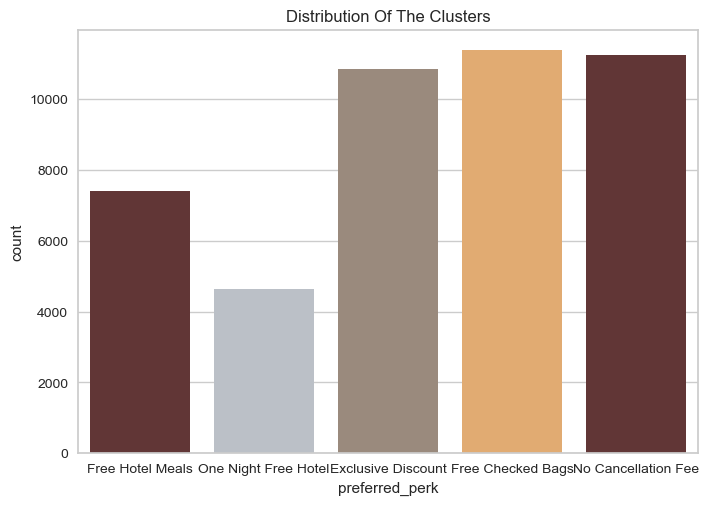

In [68]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=clean_df["preferred_perk"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [69]:
# Count the number of customers for each preferred perk
perk_counts = clean_df['preferred_perk'].value_counts().reset_index()
perk_counts.columns = ['Perks', 'count']

# Print the counts
print(perk_counts)


                  Perks  count
0     Free Checked Bags  11391
1   No Cancellation Fee  11249
2    Exclusive Discount  10838
3      Free Hotel Meals   7399
4  One Night Free Hotel   4629


In [70]:


# Group by the preferred perk and calculate summary statistics for demographic information
demographic_profiles = clean_df.groupby('preferred_perk').agg({
    'age': ['mean', 'median'],
    'gender': lambda x: x.mode()[0],  # Most common gender
    'married': lambda x: x.mode()[0],  # Proportion of married customers
    'has_children': lambda x: x.mode()[0],  # Proportion of customers with children
    'home_country': lambda x: x.mode()[0],  # Most common home country
    'home_city': lambda x: x.mode()[0]  # Most common home city
}).reset_index()

# Rename columns for better readability
demographic_profiles.columns = ['preferred_perk', 'age_mean', 'age_median', 'gender_mode', 'married_proportion', 'has_children_proportion', 'home_country_mode', 'home_city_mode']

# Print the demographic profile summary
print(demographic_profiles)



         preferred_perk   age_mean  age_median gender_mode married_proportion  \
0    Exclusive Discount  42.198561        42.0           F          unmarried   
1     Free Checked Bags  42.112633        42.0           F          unmarried   
2      Free Hotel Meals  41.070820        41.0           F          unmarried   
3   No Cancellation Fee  41.708241        42.0           F          unmarried   
4  One Night Free Hotel  42.195291        42.0           F          unmarried   

  has_children_proportion home_country_mode home_city_mode  
0         has no children               usa       new york  
1         has no children               usa    los angeles  
2         has no children               usa       new york  
3         has no children               usa       new york  
4         has no children               usa       new york  


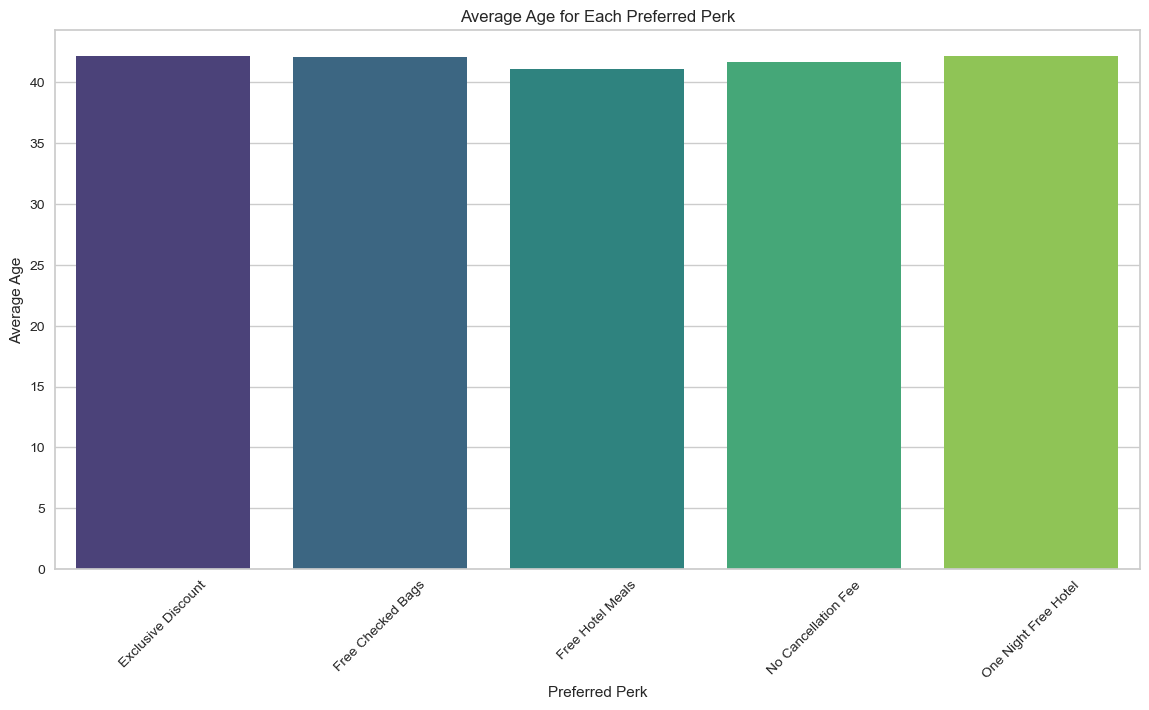

In [71]:
# Visualize the demographic profiles

# Example: Visualize average age for each preferred perk
plt.figure(figsize=(14, 7))
sns.barplot(x='preferred_perk', y='age_mean', data=demographic_profiles, palette='viridis')
plt.title('Average Age for Each Preferred Perk')
plt.ylabel('Average Age')
plt.xlabel('Preferred Perk')
plt.xticks(rotation=45)
plt.show()





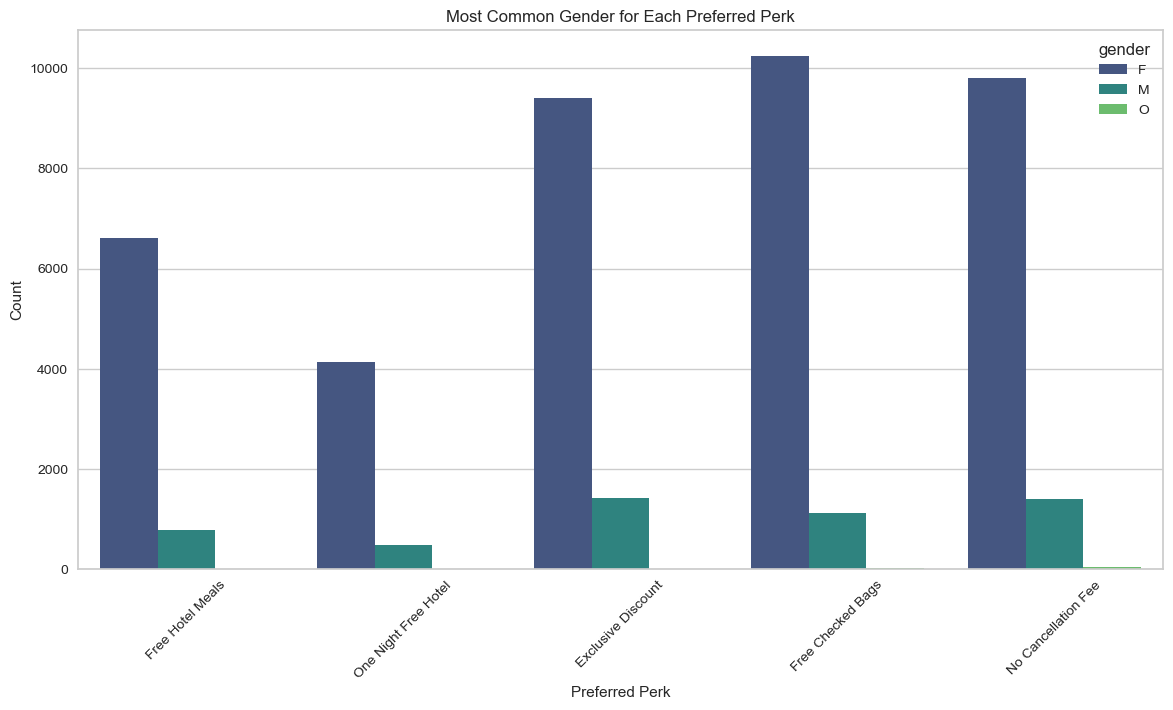

In [72]:
# Example: Visualize the most common gender for each preferred perk
plt.figure(figsize=(14, 7))
sns.countplot(x='preferred_perk', hue='gender', data=clean_df, palette='viridis')
plt.title('Most Common Gender for Each Preferred Perk')
plt.ylabel('Count')
plt.xlabel('Preferred Perk')
plt.xticks(rotation=45)
plt.show()

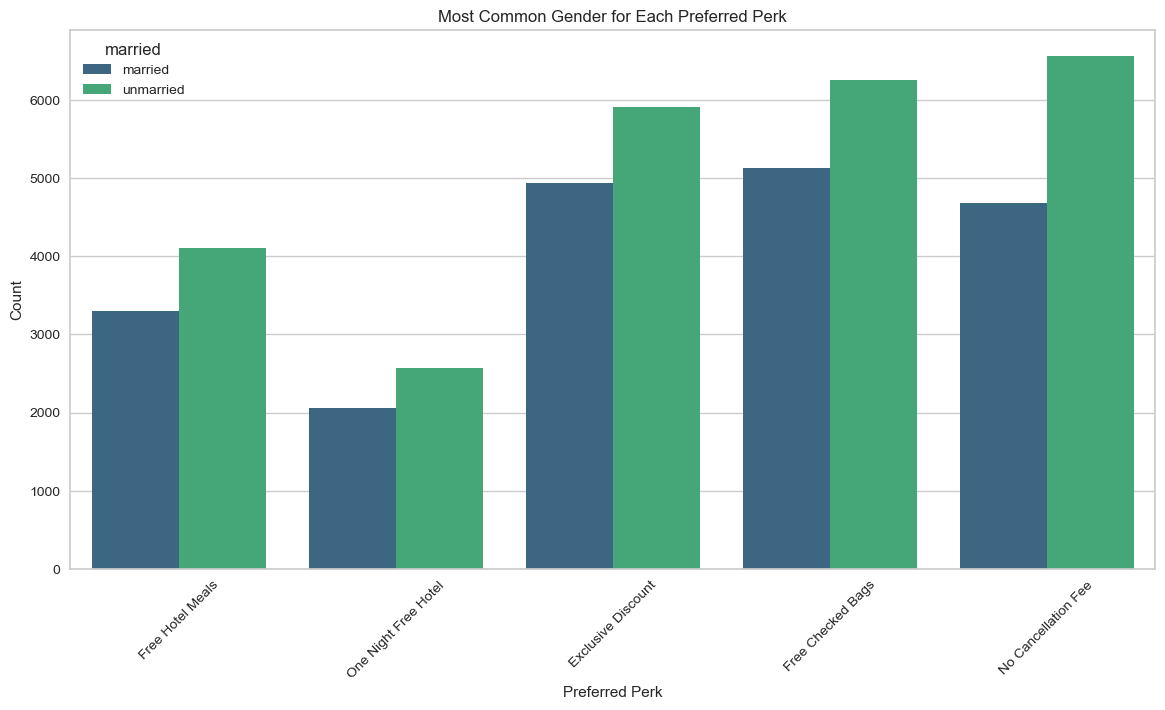

In [76]:
# Example: Visualize the most common gender for each preferred perk
plt.figure(figsize=(14, 7))
sns.countplot(x='preferred_perk', hue='married', data=clean_df, palette='viridis')
plt.title('Most Common Gender for Each Preferred Perk')
plt.ylabel('Count')
plt.xlabel('Preferred Perk')
plt.xticks(rotation=45)
plt.show()

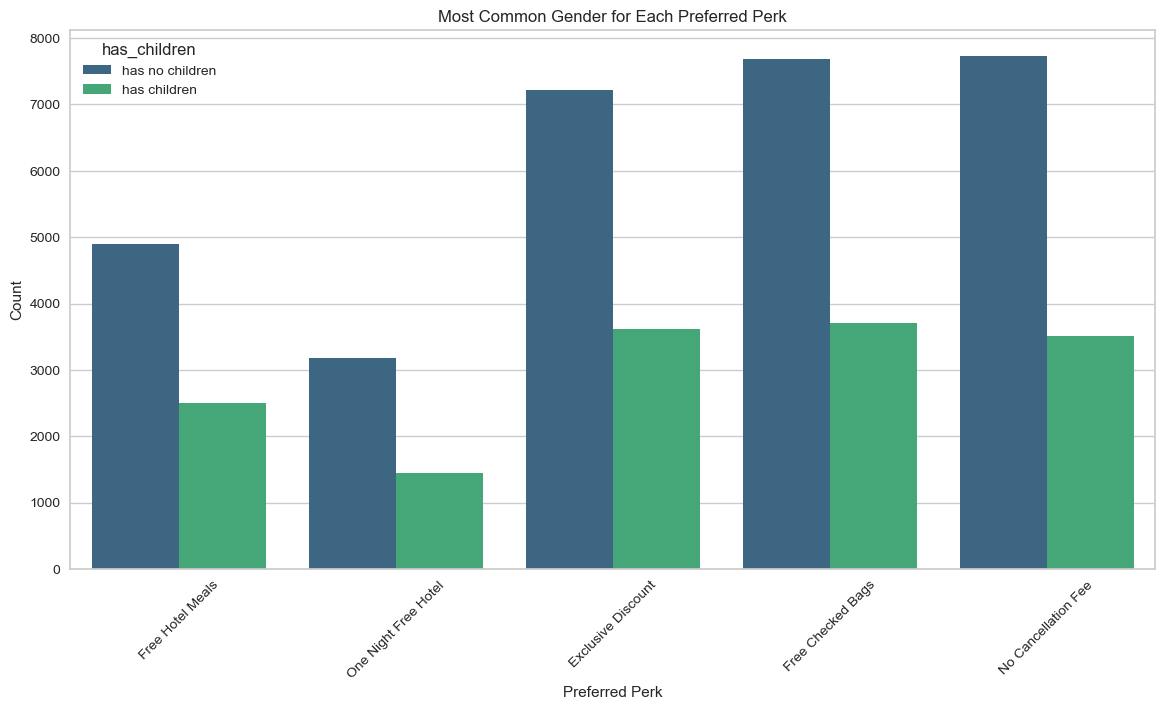

In [77]:
# Example: Visualize the most common gender for each preferred perk
plt.figure(figsize=(14, 7))
sns.countplot(x='preferred_perk', hue='has_children', data=clean_df, palette='viridis')
plt.title('Most Common Gender for Each Preferred Perk')
plt.ylabel('Count')
plt.xlabel('Preferred Perk')
plt.xticks(rotation=45)
plt.show()